## Source  of data

[Hourly Energy Consumption](https://www.kaggle.com/robikscube/hourly-energy-consumption)


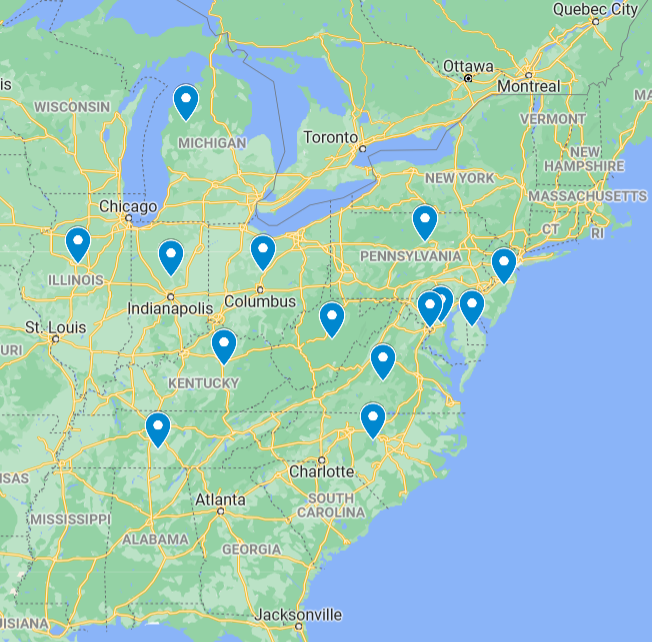

# Group members and their contributions
The team members are:

        Siavash Heydari: Feature engineering, Feature selection, ML Modeling
        Armin Hajar Sabri : Feature engineering, Feature selection, ML Modeling
        Nazila Engarnevis: Date preprocessing, Visulization,Feature selection



# Abstract

The purpose of this project was to preprocess, cluster and predict PJM Hourly Energy Consumption Data. PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of the District of Columbia.

The data consists of the hourly power consumption data comes from PJM's website and are in megawatts (MW) which give us hourly power consumption for 12 regions but the regions have changed over the years so data may only appear for certain dates per region.

We first ploting to show energy consumption, find trends in energy consumption around hours of the day, workdays,season or long term trends. Understand how daily trends change depending of the time of year. Summer trends are very different than winter trends, etc.

We further use ANN model to deal with our time series data for respective region. Finally we use RMSE to evaluate the performance of our  ANN model.

# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from IPython.core.display  import HTML
# from IPython.display       import Image
from datetime              import datetime, timedelta

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

from sklearn.metrics       import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


import random
import warnings
warnings.filterwarnings( 'ignore' )

#  Loading Data

##### In this data set in Kaggel, data were avalibe in two shape, 12 CSV files for each individual region, and one CSV file inclue all.

##### To avoid getting NAN values in our dataframe, we decided to load all 12 CSV files.

In [2]:
aep = pd.read_csv( 'data/AEP_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
aep['Datetime']=pd.to_datetime(aep['Datetime']);aep.sort_values(by='Datetime')

comed = pd.read_csv( 'data/COMED_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
comed['Datetime']=pd.to_datetime(comed['Datetime']);comed.sort_values(by='Datetime')

dayton = pd.read_csv( 'data/DAYTON_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
dayton['Datetime']=pd.to_datetime(dayton['Datetime']);dayton.sort_values(by='Datetime')

deok = pd.read_csv( 'data/DEOK_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
deok['Datetime']=pd.to_datetime(deok['Datetime']);deok.sort_values(by='Datetime')

dom = pd.read_csv( 'data/DOM_hourly.csv' ).drop_duplicates(subset='Datetime',keep='last',inplace=False)
dom['Datetime']=pd.to_datetime(dom['Datetime']);dom.sort_values(by='Datetime')

duq = pd.read_csv( 'data/DUQ_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
duq['Datetime']=pd.to_datetime(duq['Datetime']);duq.sort_values(by='Datetime')

ekpc = pd.read_csv( 'data/EKPC_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
ekpc['Datetime']=pd.to_datetime(ekpc['Datetime']);ekpc.sort_values(by='Datetime')

fe = pd.read_csv( 'data/FE_hourly.csv' ).drop_duplicates(subset='Datetime',keep='last',inplace=False)
fe['Datetime']=pd.to_datetime(fe['Datetime']);fe.sort_values(by='Datetime')

ni = pd.read_csv( 'data/NI_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
ni['Datetime']=pd.to_datetime(ni['Datetime']);ni.sort_values(by='Datetime')

pjm = pd.read_csv( 'data/PJM_Load_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
pjm['Datetime']=pd.to_datetime(pjm['Datetime']);pjm.sort_values(by='Datetime')

pjme = pd.read_csv( 'data/PJME_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
pjme['Datetime']=pd.to_datetime(pjme['Datetime']);pjme.sort_values(by='Datetime')

pjmw = pd.read_csv( 'data/PJMW_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
pjmw['Datetime']=pd.to_datetime(pjmw['Datetime']);pjmw.sort_values(by='Datetime')

Datetime  PJMW_MW
6574   2002-04-01 01:00:00   4374.0
6575   2002-04-01 02:00:00   4306.0
6576   2002-04-01 03:00:00   4322.0
6577   2002-04-01 04:00:00   4359.0
6578   2002-04-01 05:00:00   4436.0
...                    ...      ...
138090 2018-08-02 20:00:00   6545.0
138091 2018-08-02 21:00:00   6496.0
138092 2018-08-02 22:00:00   6325.0
138093 2018-08-02 23:00:00   5892.0
138094 2018-08-03 00:00:00   5489.0

[143202 rows x 2 columns]

#### To check with other data set, the dataframe with all region loaded.

In order to check for any desciprncy between 12 loaded files and big CSV file, they are compared region by region.

In [3]:
df_2nd = pd.read_csv( './data/pjm_hourly_est.csv')

In [4]:
print('The discrepancy between combined and separate file for AEP region is: {} rows'.format(abs(len(aep['AEP_MW'])-len(df_2nd['AEP'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for COMED region is: {} rows'.format(abs(len(comed['COMED_MW'])-len(df_2nd['COMED'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for DYTON region is: {} rows'.format(abs(len(dayton['DAYTON_MW'])-len(df_2nd['DAYTON'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for DEOK region is: {} rows'.format(abs(len(deok['DEOK_MW'])-len(df_2nd['DEOK'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for DEOK region is: {} rows'.format(abs(len(dom['DOM_MW'])-len(df_2nd['DOM'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for DUQ region is: {} rows'.format(abs(len(duq['DUQ_MW'])-len(df_2nd['DUQ'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for EKPC region is: {} rows'.format(abs(len(ekpc['EKPC_MW'])-len(df_2nd['EKPC'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for FE region is: {} rows'.format(abs(len(fe['FE_MW'])-len(df_2nd['FE'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for NI region is: {} rows'.format(abs(len(ni['NI_MW'])-len(df_2nd['NI'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for PJME region is: {} rows'.format(abs(len(pjme['PJME_MW'])-len(df_2nd['PJME'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for PJMW region is: {} rows' .format(abs(len(pjmw['PJMW_MW'])-len(df_2nd['PJMW'].dropna().reset_index(drop= True)))))
print('The discrepancy between combined and separate file for PJM region is: {} rows'.format(abs(len(pjm['PJM_Load_MW'])-len(df_2nd['PJM_Load'].dropna().reset_index(drop= True)))))


The discrepancy between combined and separate file for AEP region is: 4 rows
The discrepancy between combined and separate file for COMED region is: 4 rows
The discrepancy between combined and separate file for DYTON region is: 4 rows
The discrepancy between combined and separate file for DEOK region is: 4 rows
The discrepancy between combined and separate file for DEOK region is: 4 rows
The discrepancy between combined and separate file for DUQ region is: 4 rows
The discrepancy between combined and separate file for EKPC region is: 4 rows
The discrepancy between combined and separate file for FE region is: 4 rows
The discrepancy between combined and separate file for NI region is: 0 rows
The discrepancy between combined and separate file for PJME region is: 4 rows
The discrepancy between combined and separate file for PJMW region is: 4 rows
The discrepancy between combined and separate file for PJM region is: 0 rows


Result showed that, for some region just 4 data missed which is not important in comparision to number of record in each region, so we negelect them.

##### We set all the data into one. To do this, we will create a column in each dataset that identifies the respective electric company

In [5]:

aep['electric_company'] = 'AEP'
comed['electric_company'] = 'COMED'
dayton['electric_company'] = 'DAYTON'
deok['electric_company'] = 'DEOK'
dom['electric_company'] = 'DOM'
duq['electric_company'] = 'DUQ'
ekpc['electric_company'] = 'EKPC'
fe['electric_company'] = 'FE'
ni['electric_company'] = 'NI'
pjm['electric_company'] = 'PJM'
pjme['electric_company'] = 'PJME'
pjmw['electric_company'] = 'PJMW'
pjmw.head(5)

Datetime  PJMW_MW electric_company
0 2002-12-31 01:00:00   5077.0             PJMW
1 2002-12-31 02:00:00   4939.0             PJMW
2 2002-12-31 03:00:00   4885.0             PJMW
3 2002-12-31 04:00:00   4857.0             PJMW
4 2002-12-31 05:00:00   4930.0             PJMW

#### We look at what percent of data are lost in their respective time scopes for each region.

The start and the End time of each region calculated, than with **period_range** and frequency of _one hour_ we were able to find out how many precent of date are missed.

In [6]:

print('Missed Energy Consumption Measurments for "AEP" Region',round((1-(len(aep.Datetime)/len(pd.period_range(min(aep.Datetime), max(aep.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "COMED" Region',round((1-(len(comed.Datetime)/len(pd.period_range(min(comed.Datetime), max(comed.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "DAYTON" Region',round((1-(len(dayton.Datetime)/len(pd.period_range(min(dayton.Datetime), max(dayton.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "DEOK" Region',round((1-(len(deok.Datetime)/len(pd.period_range(min(deok.Datetime), max(deok.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "DOM" Region',round((1-(len(dom.Datetime)/len(pd.period_range(min(dom.Datetime), max(dom.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "DUQ" Region',round((1-(len(duq.Datetime)/len(pd.period_range(min(duq.Datetime), max(duq.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "EKPC" Region',round((1-(len(ekpc.Datetime)/len(pd.period_range(min(ekpc.Datetime), max(ekpc.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "FE" Region',round((1-(len(fe.Datetime)/len(pd.period_range(min(fe.Datetime), max(fe.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "NI" Region',round((1-(len(ni.Datetime)/len(pd.period_range(min(ni.Datetime), max(ni.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "PJME" Region',round((1-(len(pjme.Datetime)/len(pd.period_range(min(pjme.Datetime), max(pjme.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "PJM" Region',round((1-(len(pjm.Datetime)/len(pd.period_range(min(pjm.Datetime), max(pjm.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "PJMW" Region',round((1-(len(pjmw.Datetime)/len(pd.period_range(min(pjmw.Datetime), max(pjmw.Datetime), freq= 'H'))))*100,3),'Percent')


Missed Energy Consumption Measurments for "AEP" Region 0.022 Percent
Missed Energy Consumption Measurments for "COMED" Region 0.017 Percent
Missed Energy Consumption Measurments for "DAYTON" Region 0.021 Percent
Missed Energy Consumption Measurments for "DEOK" Region 0.016 Percent
Missed Energy Consumption Measurments for "DOM" Region 0.02 Percent
Missed Energy Consumption Measurments for "DUQ" Region 0.02 Percent
Missed Energy Consumption Measurments for "EKPC" Region 0.013 Percent
Missed Energy Consumption Measurments for "FE" Region 0.016 Percent
Missed Energy Consumption Measurments for "NI" Region 0.024 Percent
Missed Energy Consumption Measurments for "PJME" Region 0.021 Percent
Missed Energy Consumption Measurments for "PJM" Region 0.024 Percent
Missed Energy Consumption Measurments for "PJMW" Region 0.021 Percent


The result from this part showed below one precent of data are missed which is neglegenble.

In [7]:
print('''Each dataset shows the megawatt energy consumption column, 
which we rename all to the same name.''')
aep = aep.rename( columns={'AEP_MW': 'mw_energy_consumption'} )
comed = comed.rename( columns={'COMED_MW': 'mw_energy_consumption'} )
dayton = dayton.rename( columns={'DAYTON_MW': 'mw_energy_consumption'} )
deok = deok.rename( columns={'DEOK_MW': 'mw_energy_consumption'} )
dom = dom.rename( columns={'DOM_MW': 'mw_energy_consumption'} )
duq = duq.rename( columns={'DUQ_MW': 'mw_energy_consumption'} )
ekpc = ekpc.rename( columns={'EKPC_MW': 'mw_energy_consumption'} )
fe = fe.rename( columns={'FE_MW': 'mw_energy_consumption'} )
ni = ni.rename( columns={'NI_MW': 'mw_energy_consumption'} )
pjm = pjm.rename( columns={'PJM_Load_MW': 'mw_energy_consumption'} )
pjme = pjme.rename( columns={'PJME_MW': 'mw_energy_consumption'} )
pjmw = pjmw.rename( columns={'PJMW_MW': 'mw_energy_consumption'} )

Each dataset shows the megawatt energy consumption column, 
which we rename all to the same name.


### What is outlier: To Drop or Not to Drop

In this picture we can see general defenition of outliers.

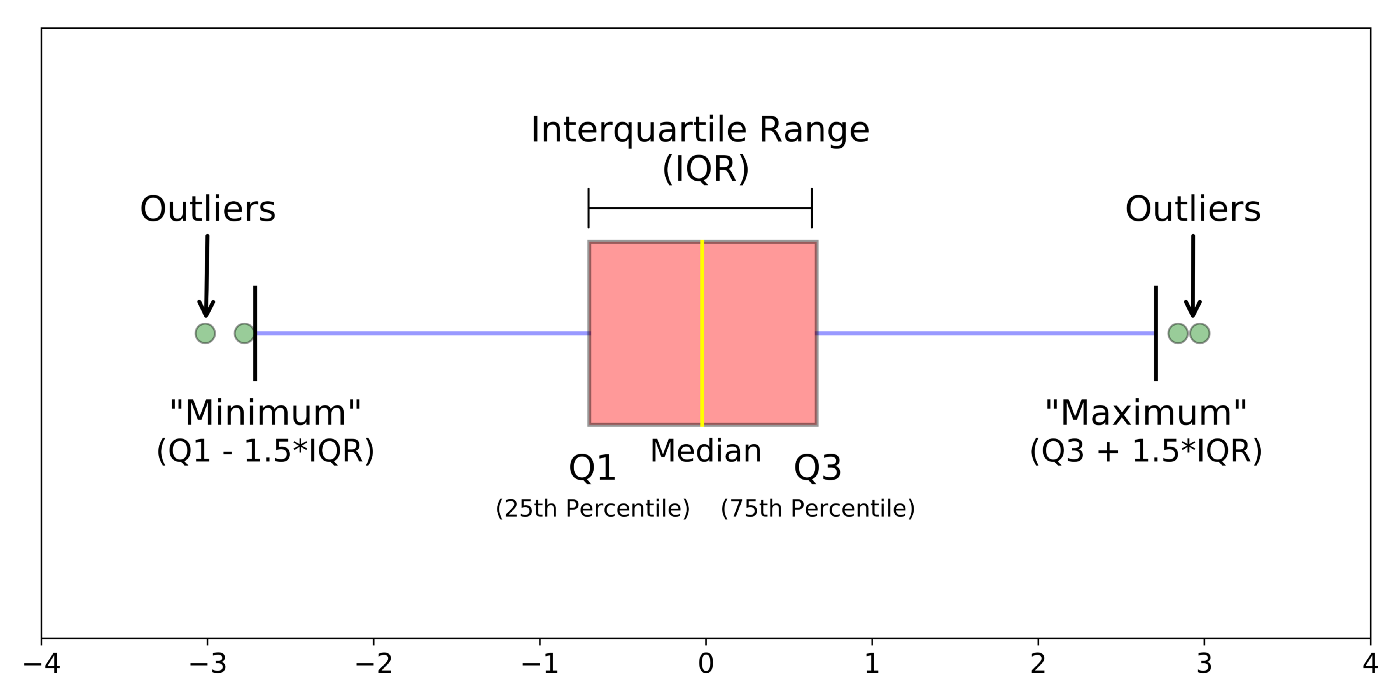

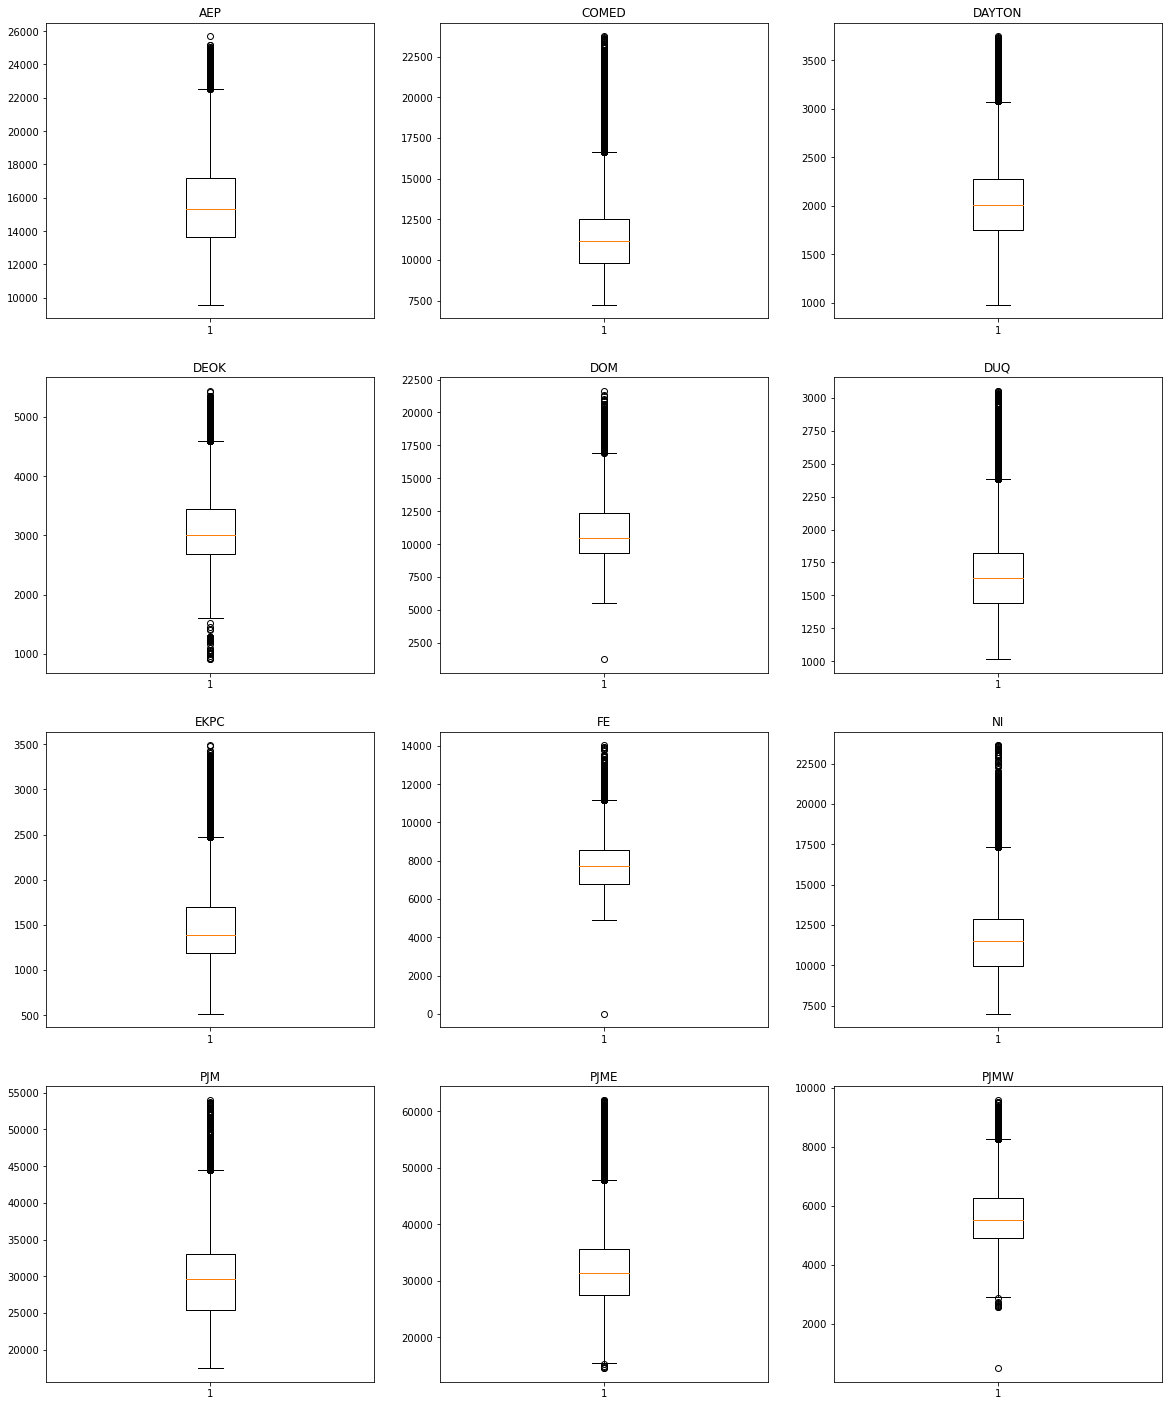

In [8]:
#We use boxplot to show the the megawatt energy consumption for respective electric company and observe the outliers
plt.figure(figsize=(20,25))
ax1 = plt.subplot(4, 3, 1);ax1.boxplot(aep['mw_energy_consumption']);ax1.title.set_text('AEP')
ax2 = plt.subplot(4, 3, 2);ax2.boxplot(comed['mw_energy_consumption']);ax2.title.set_text('COMED')
ax3 = plt.subplot(4, 3, 3);ax3.boxplot(dayton['mw_energy_consumption']);ax3.title.set_text('DAYTON')
ax4 = plt.subplot(4, 3, 4);ax4.boxplot(deok['mw_energy_consumption']);ax4.title.set_text('DEOK')
ax5 = plt.subplot(4, 3, 5);ax5.boxplot(dom['mw_energy_consumption']);ax5.title.set_text('DOM')
ax6 = plt.subplot(4, 3, 6);ax6.boxplot(duq['mw_energy_consumption']);ax6.title.set_text('DUQ')
ax7 = plt.subplot(4, 3, 7);ax7.boxplot(ekpc['mw_energy_consumption']);ax7.title.set_text('EKPC')
ax8 = plt.subplot(4, 3, 8);ax8.boxplot(fe['mw_energy_consumption']);ax8.title.set_text('FE')
ax9 = plt.subplot(4, 3, 9);ax9.boxplot(ni['mw_energy_consumption']);ax9.title.set_text('NI')
ax10 = plt.subplot(4, 3, 10);ax10.boxplot(pjm['mw_energy_consumption']);ax10.title.set_text('PJM')
ax11 = plt.subplot(4, 3, 11);ax11.boxplot(pjme['mw_energy_consumption']);ax11.title.set_text('PJME')
ax12 = plt.subplot(4, 3, 12);ax12.boxplot(pjmw['mw_energy_consumption']);ax12.title.set_text('PJMW')
plt.show()

Based on box plots in most of regions, outlier are visible, but since in almost all region the data records formed a continuse line we won't drop them ecxept in *PJMW* , *FE* and *DOM*  which one single record are far from main distribution of data.

In [9]:
#We remove outliers for these three electric companies
remov1_inx = dom["mw_energy_consumption"].idxmin();dom = dom.drop(remov1_inx)
remov2_inx = fe["mw_energy_consumption"].idxmin();fe = fe.drop(remov2_inx)
remov3_inx = pjmw["mw_energy_consumption"].idxmin();pjmw = pjmw.drop(remov3_inx)


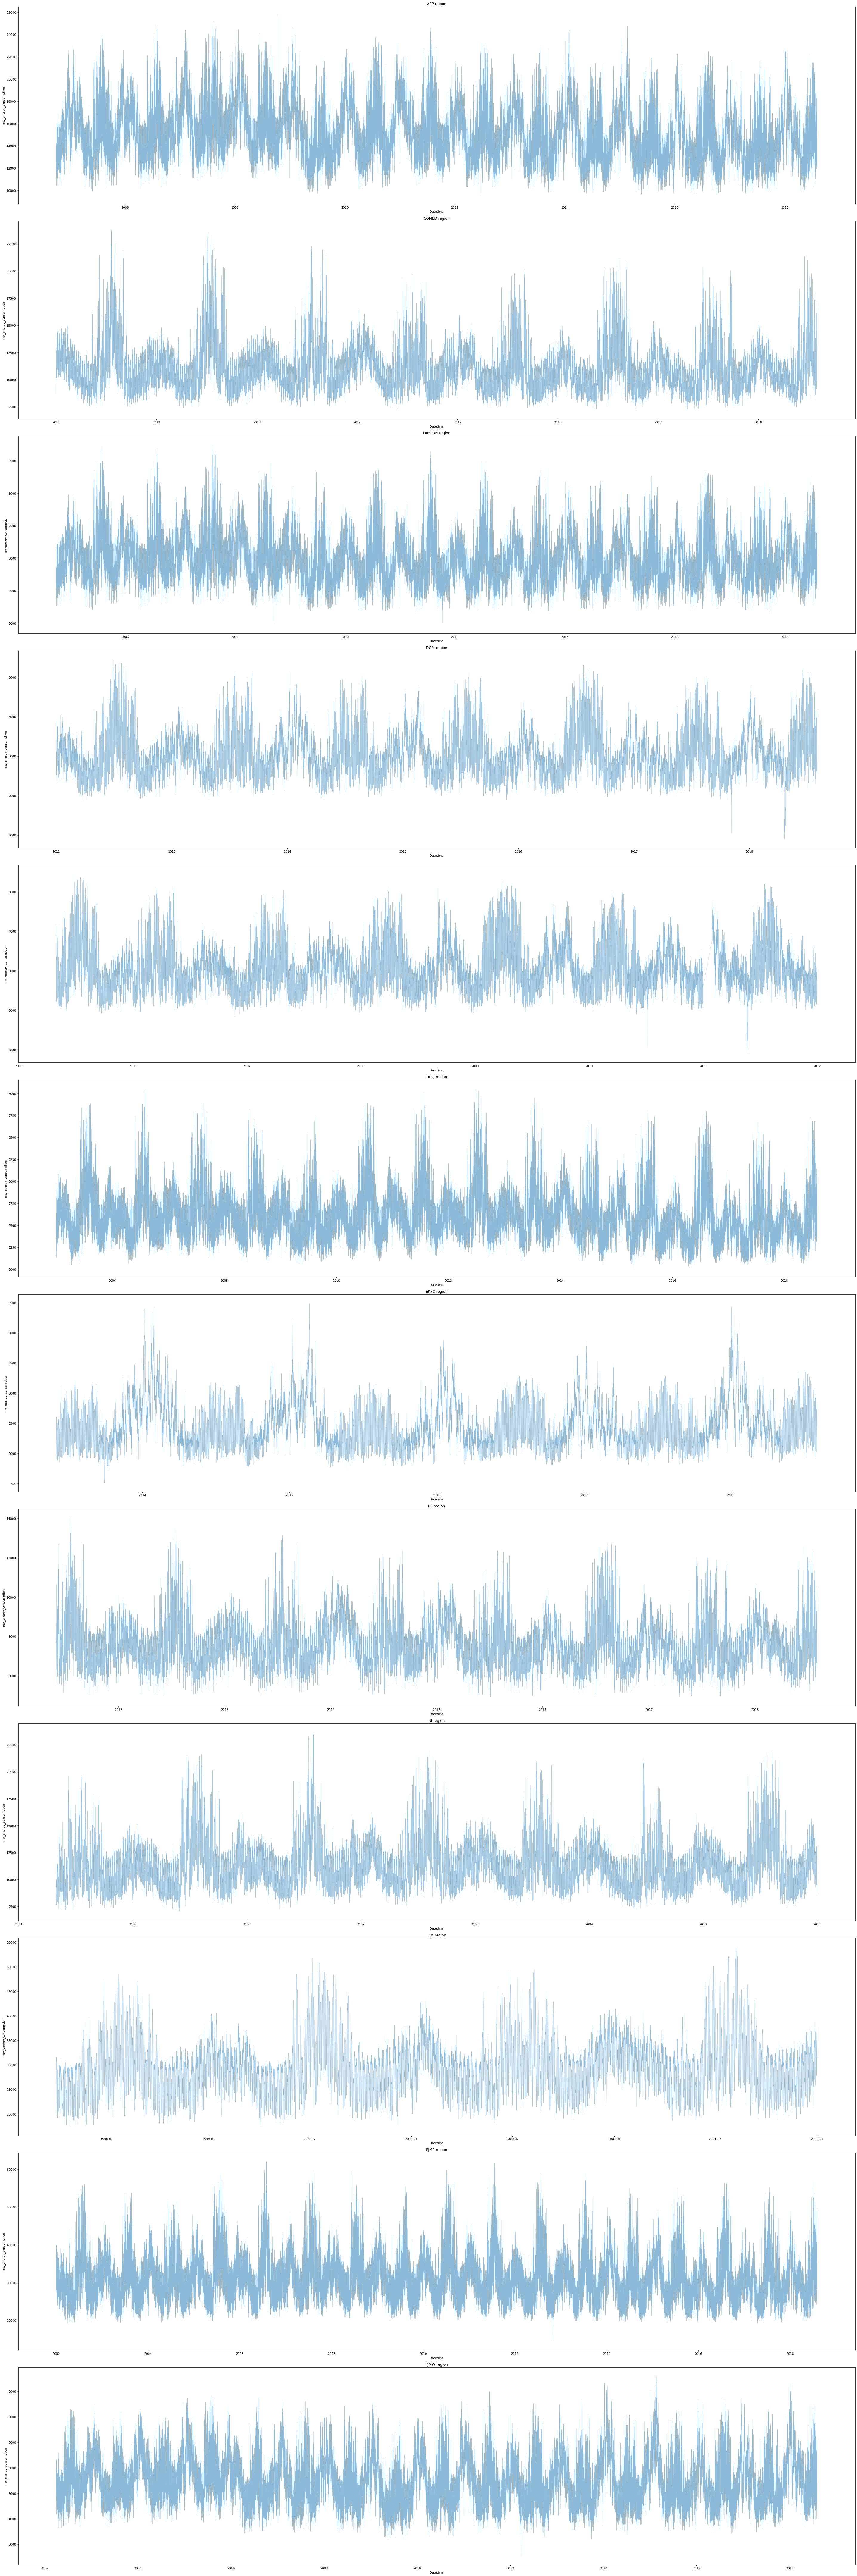

In [10]:
# We use line plots to show how much electricity was consumed on hourly in each region during their  certain dates
plt.figure(figsize=(40,120))
plt.subplot( 12, 1, 1)
ax1 = sns.lineplot(aep["Datetime"],aep["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax1.title.set_text('AEP region')
plt.subplot( 12, 1, 2)
ax2 = sns.lineplot(comed["Datetime"],comed["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax2.title.set_text('COMED region')
plt.subplot( 12, 1, 3)
ax3 = sns.lineplot(dayton["Datetime"],dayton["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax3.title.set_text('DAYTON region')
plt.subplot( 12, 1, 4)
ax4 = sns.lineplot(deok["Datetime"],deok["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax4.title.set_text('DEOK region')
plt.subplot( 12, 1, 5)
ax5 = sns.lineplot(dom["Datetime"],deok["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax4.title.set_text('DOM region')
plt.subplot( 12, 1, 6)
ax6 = sns.lineplot(duq["Datetime"],duq["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax6.title.set_text('DUQ region')
plt.subplot( 12, 1, 7)
ax7 = sns.lineplot(ekpc["Datetime"],ekpc["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax7.title.set_text('EKPC region')
plt.subplot( 12, 1, 8)
ax8 = sns.lineplot(fe["Datetime"],fe["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax8.title.set_text('FE region')
plt.subplot( 12, 1, 9)
ax9 = sns.lineplot(ni["Datetime"],ni["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax9.title.set_text('NI region')
plt.subplot( 12, 1, 10)
ax10 = sns.lineplot(pjm["Datetime"],pjm["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax10.title.set_text('PJM region')
plt.subplot( 12, 1, 11)
ax11 = sns.lineplot(pjme["Datetime"],pjme["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax11.title.set_text('PJME region')
plt.subplot( 12, 1, 12)
ax11 = sns.lineplot(pjmw["Datetime"],pjmw["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax11.title.set_text('PJMW region')
plt.tight_layout() 

plt.show()

In [11]:
# We concatenate all the datasets together
df_raw = pd.concat( [aep, comed, dayton, deok, dom, duq, ekpc, fe, ni, pjm, pjme, pjmw])
df_raw = df_raw.reset_index().drop(['index'],axis= 1)
df_raw.sample(5) # check

Datetime  mw_energy_consumption electric_company
44500  2009-03-05 16:00:00                15174.0              AEP
208603 2007-11-15 15:00:00                 2328.0           DAYTON
188399 2004-12-05 14:00:00                 1725.0           DAYTON
79630  2013-03-02 20:00:00                17748.0              AEP
50077  2010-07-15 03:00:00                14232.0              AEP

In [12]:
print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090124 entries, 0 to 1090123
Data columns (total 3 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Datetime               1090124 non-null  datetime64[ns]
 1   mw_energy_consumption  1090124 non-null  float64       
 2   electric_company       1090124 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.0+ MB
None


#### Next, we will describe the data. At the beginning of each step, we copy the dataset to make it easier to reload the data in case of problems in the project.

In [13]:
df1 = df_raw.copy()

<AxesSubplot:xlabel='mw_energy_consumption', ylabel='electric_company'>

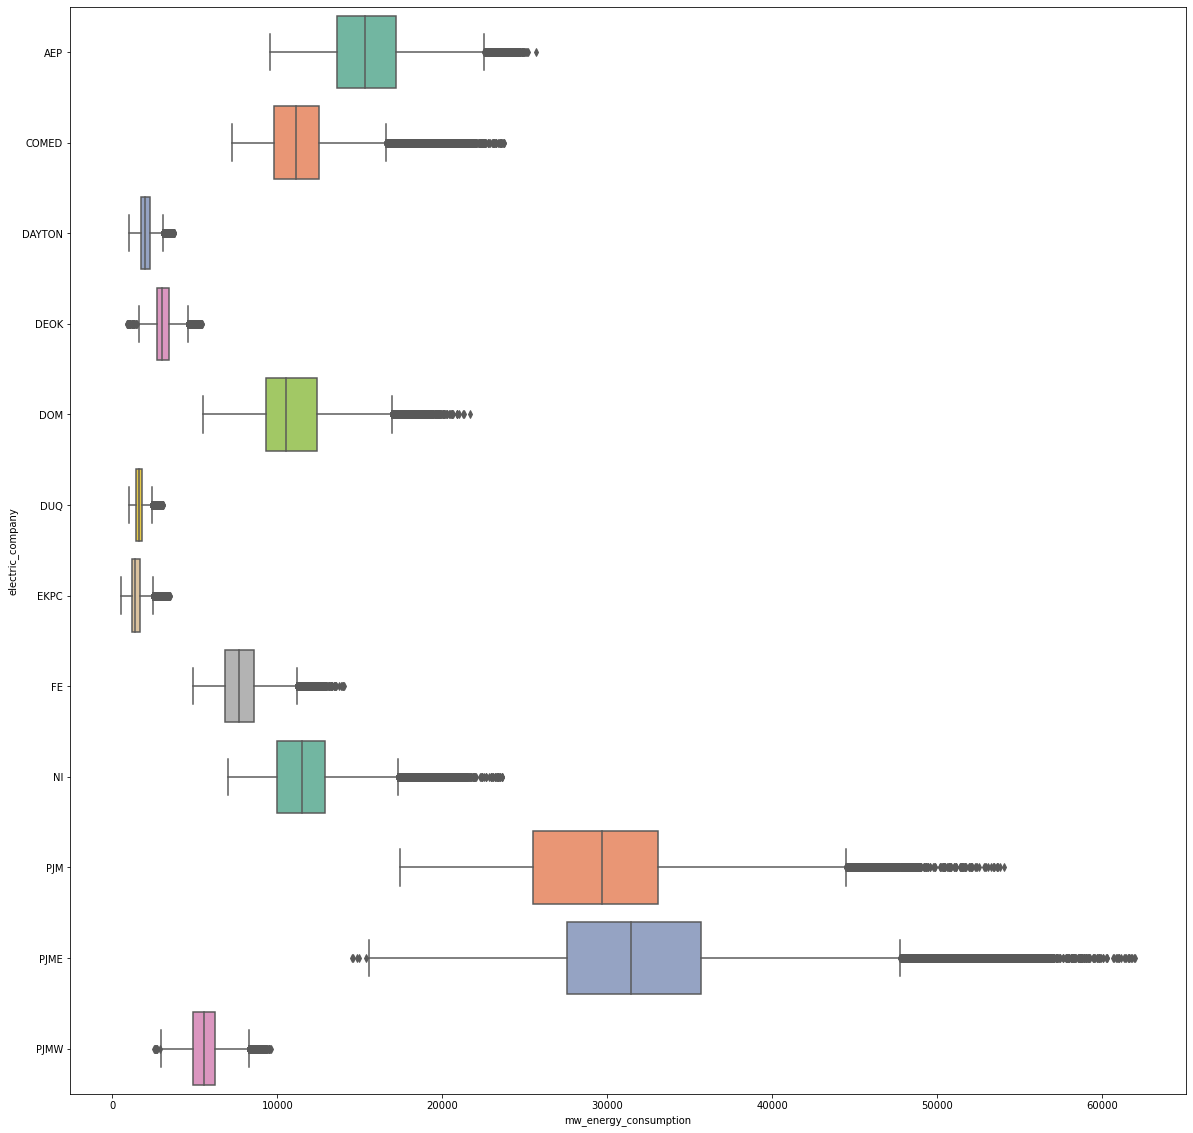

In [14]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot( y= 'electric_company', x='mw_energy_consumption' , data=df1 ,palette="Set2")

# DESCRIPTION OF DATA

### Check NA

In [15]:
df1.isna().sum()

Datetime                 0
mw_energy_consumption    0
electric_company         0
dtype: int64

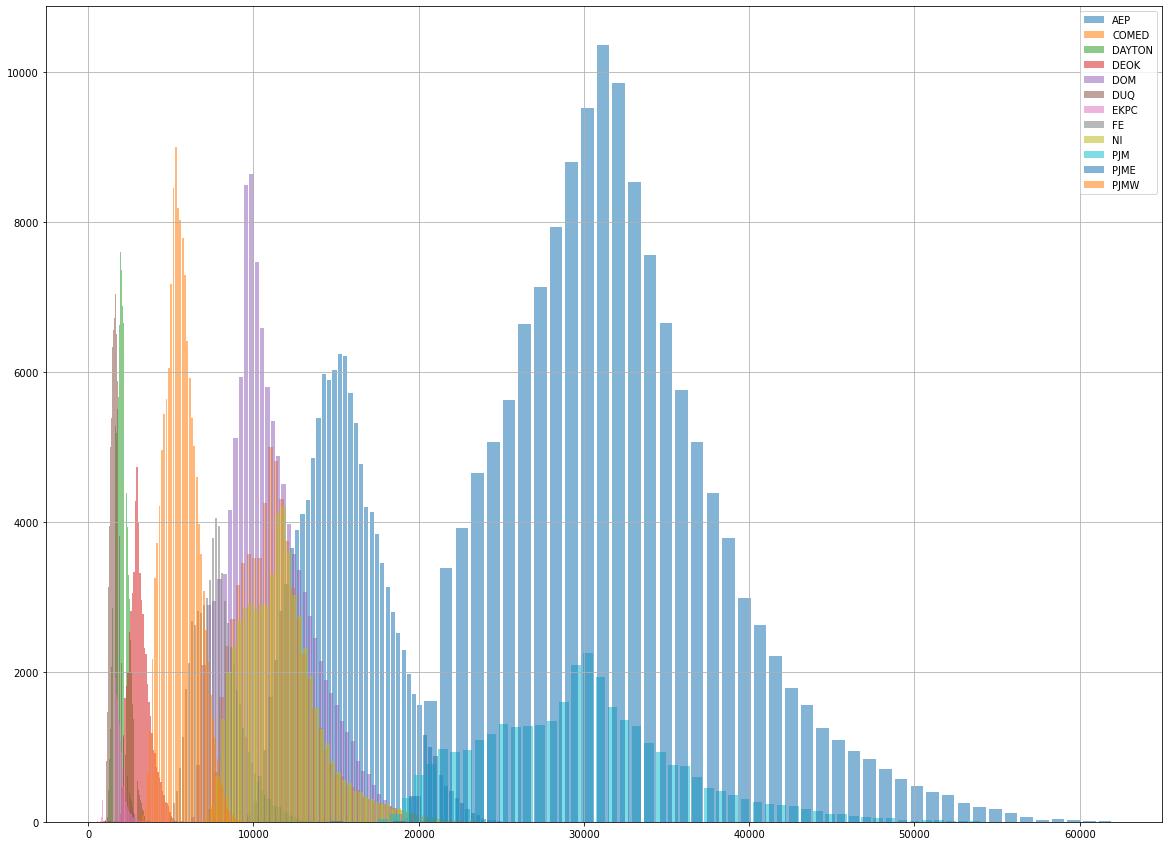

In [16]:
# We use histogram to show the megawatt energy consumption for respective company
lab = df1['electric_company'].unique()
df1.groupby(['electric_company'])['mw_energy_consumption'].hist(bins=50, figsize=(20,15),alpha = 0.55,rwidth = .8)
plt.legend(lab)
plt.show()

<AxesSubplot:xlabel='mw_energy_consumption', ylabel='Density'>

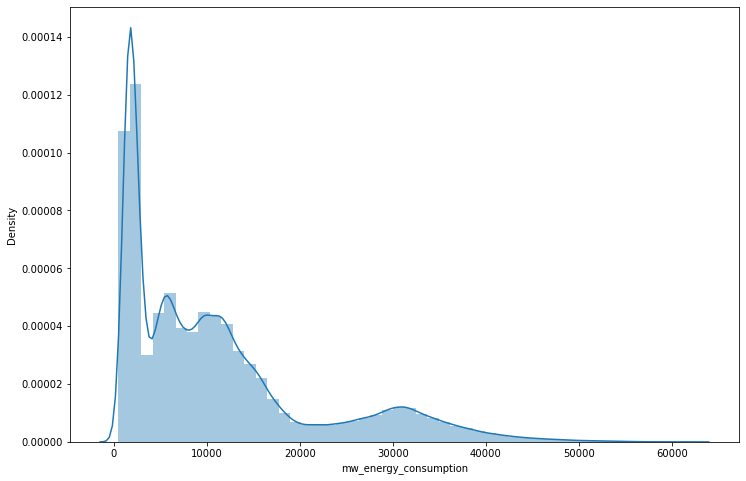

In [17]:
# We use histogram to show the megawatt energy consumption for all company
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot( df1['mw_energy_consumption'], hist=True )

In [18]:
desc = pd.DataFrame(sc.stats.describe(df1['mw_energy_consumption'].to_numpy())).T
desc.columns=['Number of observations','Min & Max', 'mean', 'variance','skewness','kurtosis']
desc

Number of observations         Min & Max          mean          variance  \
0                1090124  (514.0, 62009.0)  11209.790699  110975480.003823   

   skewness  kurtosis  
0  1.356395  1.198169

Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.


(Kurtosis > 3): Distribution is longer, tails are fatter. Peak is higher and sharper than Mesokurtic, which means that data are heavy-tailed or profusion of outliers.
Outliers stretch the horizontal axis of the histogram graph, which makes the bulk of the data appear in a narrow (“skinny”) vertical range, thereby giving the “skinniness” of a leptokurtic distribution.




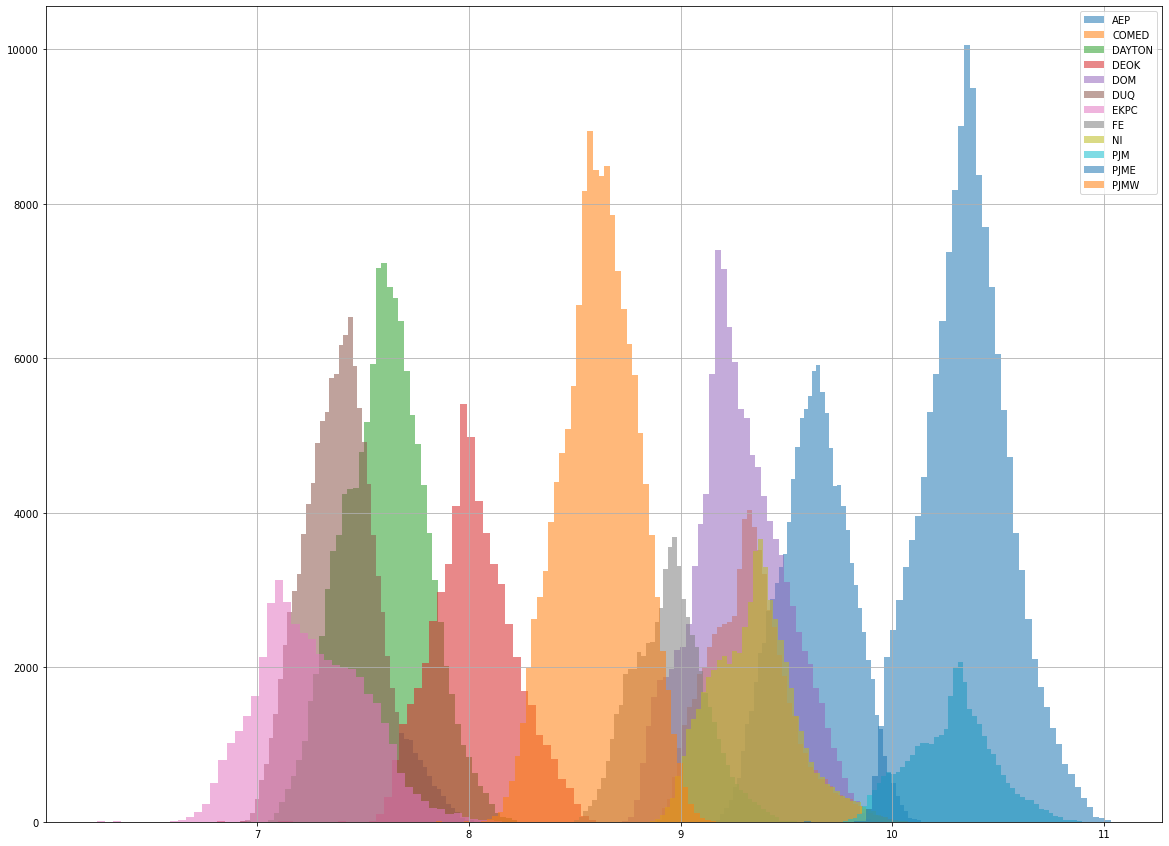

In [19]:
# We use histogram to show the log megawatt energy consumption for respective company
df_log = df1.copy()
df_log['mw_energy_consumption'] = df_log.groupby('electric_company')['mw_energy_consumption'].transform(lambda x: np.log(x))
df_log.groupby(['electric_company'])['mw_energy_consumption'].hist(bins=50, figsize=(20,15),alpha = 0.55)
plt.legend(lab)
plt.show()

# FEATURE ENGINEERING

#### We want to have a view of the evolution of energy consumption by looking only at the day of week,  month, year, day sessions, workdays and season as information.

In this function at the beginging, DateTime column change to date-time series.

So we define a function to generate these feature:

  dow(day of week):
 

     0 - Monday
     1 - Tuesday
     2 - Wednesday
     3 - Thursday
     4 - Friday
     5 - Saturday
     6 - Sunday 

##### 
Day session:

    0am to 6 am :Night
    6am to 12 pm: Morning
    12pm to 18pm : Afternoon 
    18pm to 24pm :Evening


Season:

    # - Winter -> December (12), January (01) and February (02);
    # - Spring -> March (03), April (04) and May (05);
    # - Summer -> Jun (06), July (07) and August (08);
    # - Autumn -> September (09), October (10) and November (11).

In [20]:
def data_prep(im_file):
         
    im_file.duplicated(subset='Datetime',keep=False).sum()
    im_file['Datetime']=pd.to_datetime(im_file['Datetime'])
  
    im_file['dow'] = im_file['Datetime'].dt.dayofweek
    im_file['month'] = im_file['Datetime'].dt.month
    im_file['year'] = im_file['Datetime'].dt.year
    im_file['Day_session']=pd.cut(im_file.Datetime.dt.hour,
               [0,6,12,18,23],
               labels=['Night','Morning','Afternoon','Evening'],
               include_lowest=True)
    im_file['Workdays']=pd.cut(im_file.Datetime.dt.dayofweek,
               [0,4,6],
               labels=['workday','weekend'],
               include_lowest=True)
    
    im_file['Season'] = im_file['Datetime'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or x.month == 2 else 'Spring' if  x.month == 3 or x.month == 4 or x.month == 5 else 'Summer' if  x.month == 6 or x.month == 7 or x.month == 8 else 'Autumn' if  x.month == 9 or x.month == 10 or x.month == 11 else '')
    return im_file

In [21]:
df2 = data_prep(df1)

In [22]:
df2_1 = df2.sort_values('Datetime',ascending=True).groupby('electric_company').head(len(df2))
df2_1

Datetime  mw_energy_consumption electric_company  dow  \
775239  1998-04-01 01:00:00                22259.0              PJM    2   
775240  1998-04-01 02:00:00                21244.0              PJM    2   
775241  1998-04-01 03:00:00                20651.0              PJM    2   
775242  1998-04-01 04:00:00                20421.0              PJM    2   
775243  1998-04-01 05:00:00                20713.0              PJM    2   
...                     ...                    ...              ...  ...   
361656  2018-08-03 00:00:00                 3281.0             DEOK    4   
642234  2018-08-03 00:00:00                 1448.0             EKPC    4   
116157  2018-08-03 00:00:00                14809.0              AEP    4   
941811  2018-08-03 00:00:00                35486.0             PJME    4   
1085012 2018-08-03 00:00:00                 5489.0             PJMW    4   

         month  year Day_session Workdays  Season  
775239       4  1998       Night  workday  Spring  
775240       4  1998       Night  workday  Spring  
775241       4  1998       Night  workday  Spring  
775242       4  1998       Night  workday  Spring  
775243       4  1998       Night  workday  Spring  
...        ...   ...         ...      ...     ...  
361656       8  2018       Night  workday  Summer  
642234       8  2018       Night  workday  Summer  
116157       8  2018       Night  workday  Summer  
941811       8  2018       Night  workday  Summer  
1085012      8  2018       Night  workday  Summer  

[1090124 rows x 9 columns]

In [23]:
df2_1 = df2_1.reset_index(drop=True)
df2_1

Datetime  mw_energy_consumption electric_company  dow  \
0       1998-04-01 01:00:00                22259.0              PJM    2   
1       1998-04-01 02:00:00                21244.0              PJM    2   
2       1998-04-01 03:00:00                20651.0              PJM    2   
3       1998-04-01 04:00:00                20421.0              PJM    2   
4       1998-04-01 05:00:00                20713.0              PJM    2   
...                     ...                    ...              ...  ...   
1090119 2018-08-03 00:00:00                 3281.0             DEOK    4   
1090120 2018-08-03 00:00:00                 1448.0             EKPC    4   
1090121 2018-08-03 00:00:00                14809.0              AEP    4   
1090122 2018-08-03 00:00:00                35486.0             PJME    4   
1090123 2018-08-03 00:00:00                 5489.0             PJMW    4   

         month  year Day_session Workdays  Season  
0            4  1998       Night  workday  Spring  
1            4  1998       Night  workday  Spring  
2            4  1998       Night  workday  Spring  
3            4  1998       Night  workday  Spring  
4            4  1998       Night  workday  Spring  
...        ...   ...         ...      ...     ...  
1090119      8  2018       Night  workday  Summer  
1090120      8  2018       Night  workday  Summer  
1090121      8  2018       Night  workday  Summer  
1090122      8  2018       Night  workday  Summer  
1090123      8  2018       Night  workday  Summer  

[1090124 rows x 9 columns]

In [24]:
df4 = df2_1.copy()

#### In below cell, data after preprocessing are visualized based on the genrated features, and counts(and density).

<AxesSubplot:xlabel='mw_energy_consumption', ylabel='Density'>

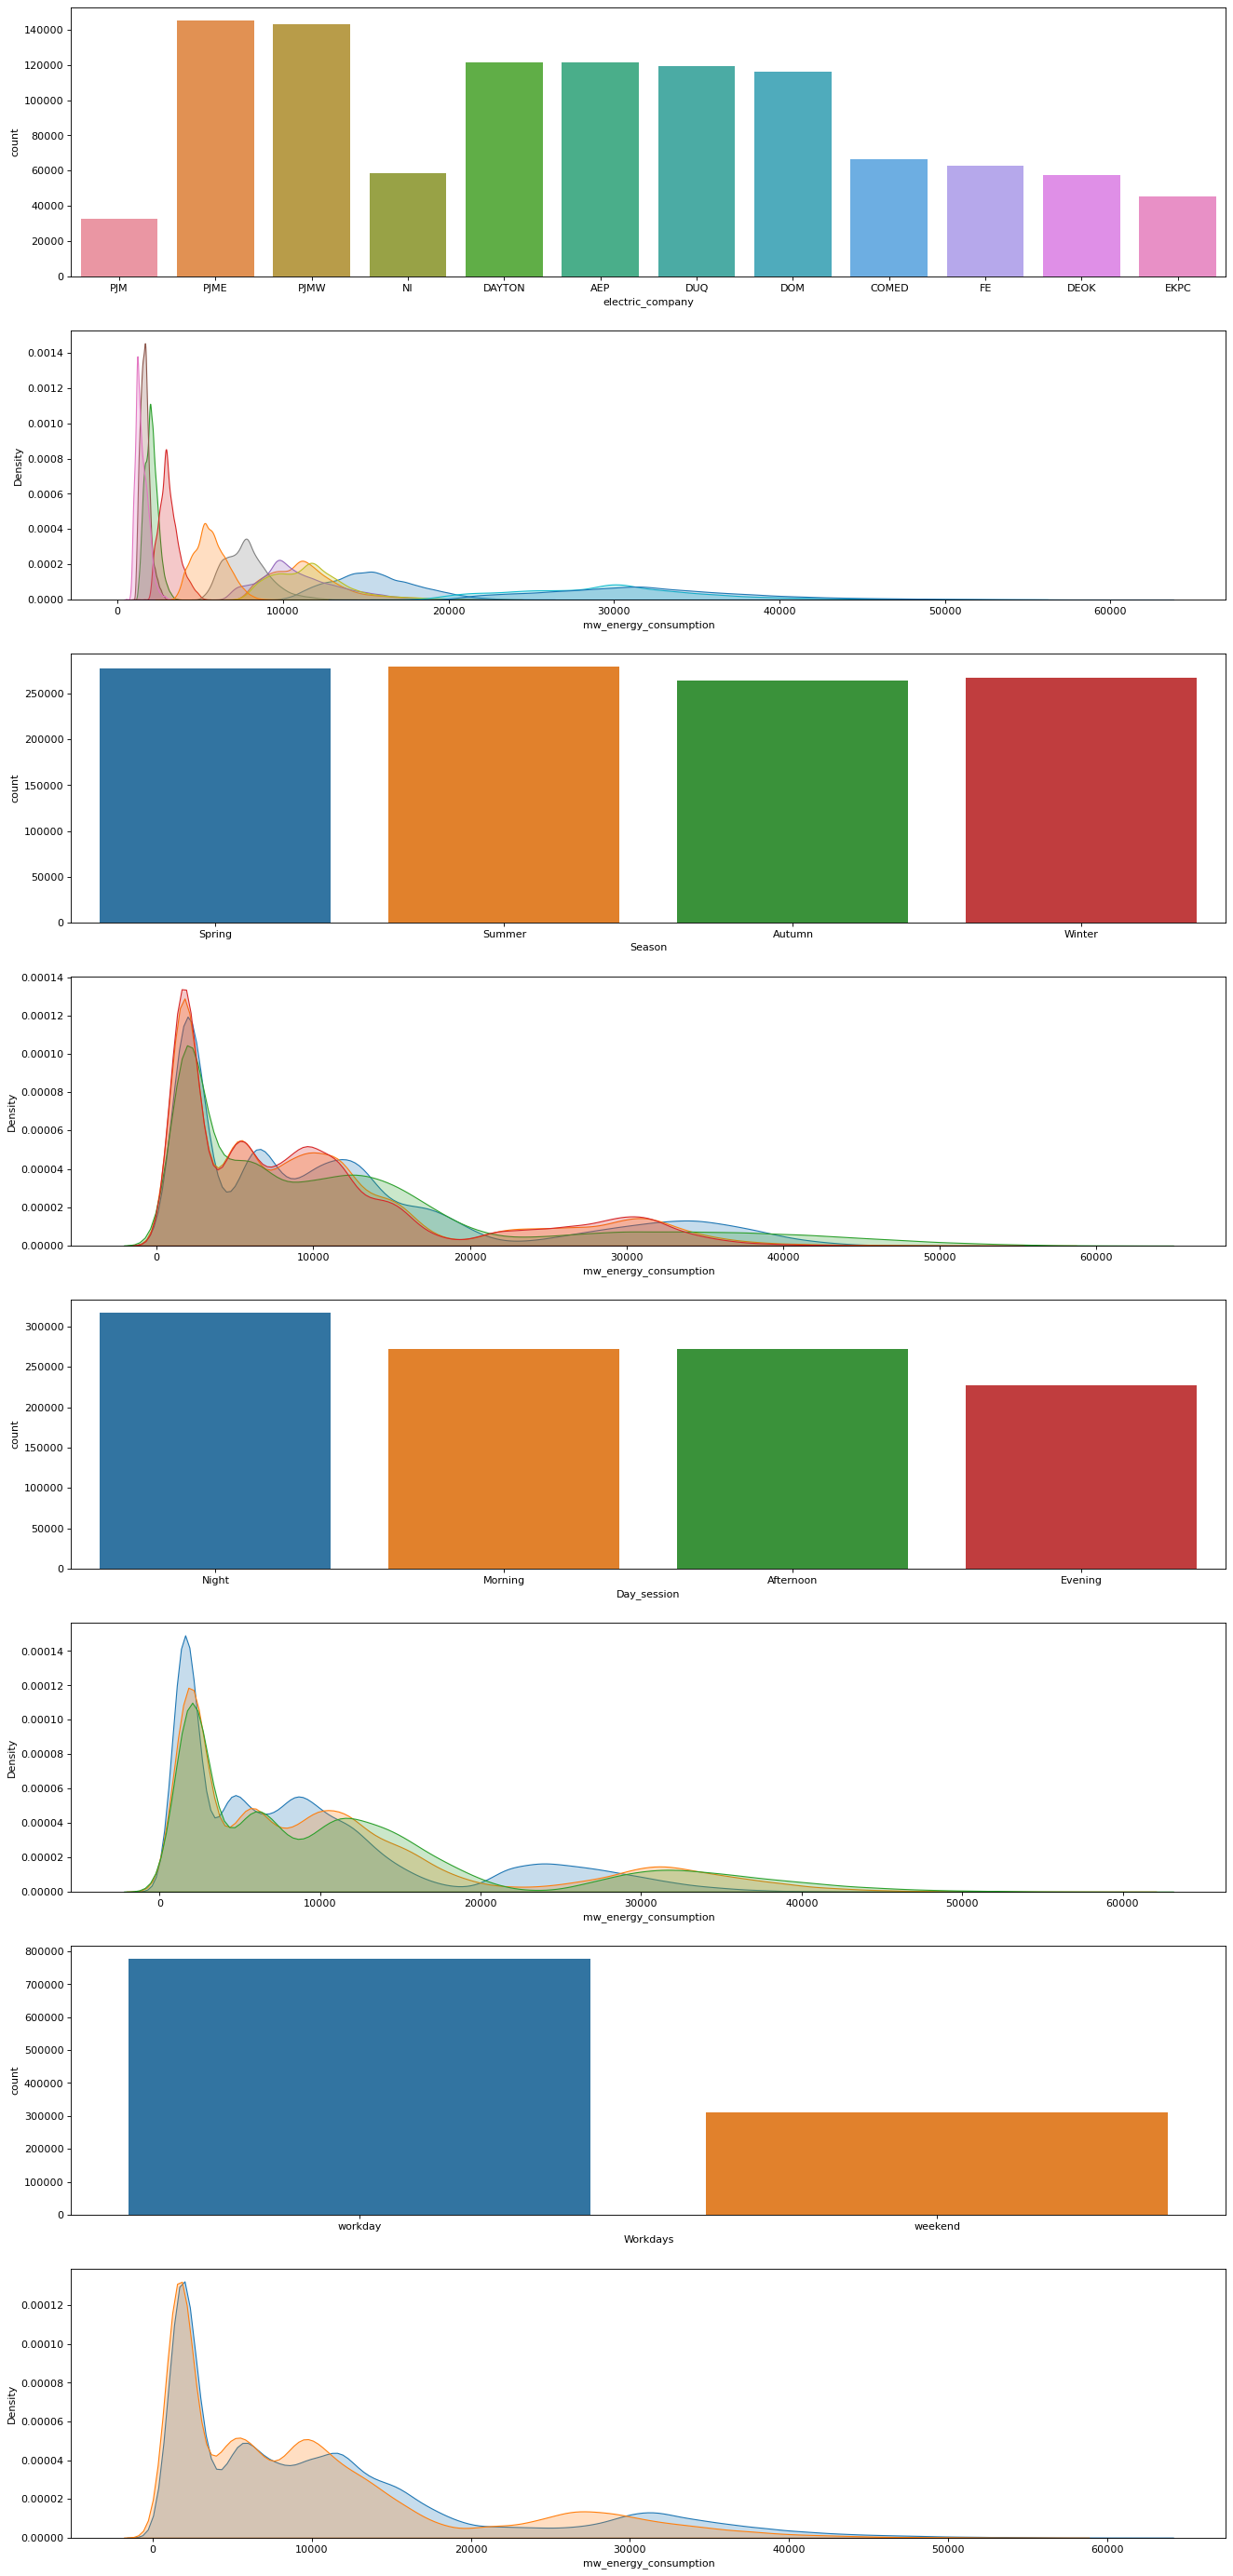

In [25]:
plt.figure(figsize=(20, 45), dpi=80)

# electric_company
plt.subplot( 8, 1, 1)
sns.countplot( df4['electric_company'] )

plt.subplot( 8, 1, 2)
sns.kdeplot( df4[df4['electric_company'] == 'AEP']['mw_energy_consumption'], label='AEP', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'COMED']['mw_energy_consumption'], label='COMED', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'DAYTON']['mw_energy_consumption'], label='DAYTON', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'DEOK']['mw_energy_consumption'], label='DEOK', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'DOM']['mw_energy_consumption'], label='DOM', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'DUQ']['mw_energy_consumption'], label='DUQ', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'EKPC']['mw_energy_consumption'], label='EKPC', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'FE']['mw_energy_consumption'], label='FE', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'NI']['mw_energy_consumption'], label='NI', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'PJM']['mw_energy_consumption'], label='PJM', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'PJME']['mw_energy_consumption'], label='PJME', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'PJMW']['mw_energy_consumption'], label='PJMW', shade=True )

# # season
plt.subplot( 8, 1, 3)
sns.countplot( df4['Season'] )

plt.subplot( 8, 1, 4)
sns.kdeplot( df4[df4['Season'] == 'Winter']['mw_energy_consumption'], label='Winter', shade=True )
sns.kdeplot( df4[df4['Season'] == 'Autumn']['mw_energy_consumption'], label='Autumn', shade=True )
sns.kdeplot( df4[df4['Season'] == 'Summer']['mw_energy_consumption'], label='Summer', shade=True )
sns.kdeplot( df4[df4['Season'] == 'Spring']['mw_energy_consumption'], label='Spring', shade=True )

# # Day session
plt.subplot( 8, 1, 5)
sns.countplot( df4['Day_session'] )

plt.subplot( 8, 1, 6)
sns.kdeplot( df4[df4['Day_session'] == 'Night']['mw_energy_consumption'], label='Night', shade=True )
sns.kdeplot( df4[df4['Day_session'] == 'Morning']['mw_energy_consumption'], label='Morning', shade=True )
sns.kdeplot( df4[df4['Day_session'] == 'Noon']['mw_energy_consumption'], label='Noon', shade=True )
sns.kdeplot( df4[df4['Day_session'] == 'Evening']['mw_energy_consumption'], label='Evening', shade=True )

# # # workdays
plt.subplot( 8, 1, 7)
sns.countplot( df4['Workdays'] )

plt.subplot( 8, 1, 8)
sns.kdeplot( df4[df4['Workdays'] == 'workday']['mw_energy_consumption'], label='workday', shade=True )
sns.kdeplot( df4[df4['Workdays'] == 'weekend']['mw_energy_consumption'], label='weekend', shade=True )




#### In this cell, since we use  categorical variable we assign a number to them in order to plot them.

In [26]:

com_num = { 'AEP': 1, 'COMED': 2, 'DAYTON': 3, 'DEOK': 4, 'DOM': 5, 'DUQ': 6, 'EKPC': 7, 'FE': 8, 'NI': 9, 'PJM': 10, 'PJME': 11, 'PJMW': 12 }
df4['electric_company'] = df4['electric_company'].map( com_num )
wed_num= { 'weekend': 1, 'workday': 2}
df4['Workdays']= df4['Workdays'].map( wed_num )
se_num= { 'Spring': 1, 'Summer': 2,'Autumn': 3,'Winter': 4}
df4['Season']= df4['Season'].map( se_num )


### Which region spend more energy
In region 'PJM': 10 and 'PJME': 11 consumed much more energy than others.
Regplot tries to plot the data and a linear regression model fit.

<AxesSubplot:>

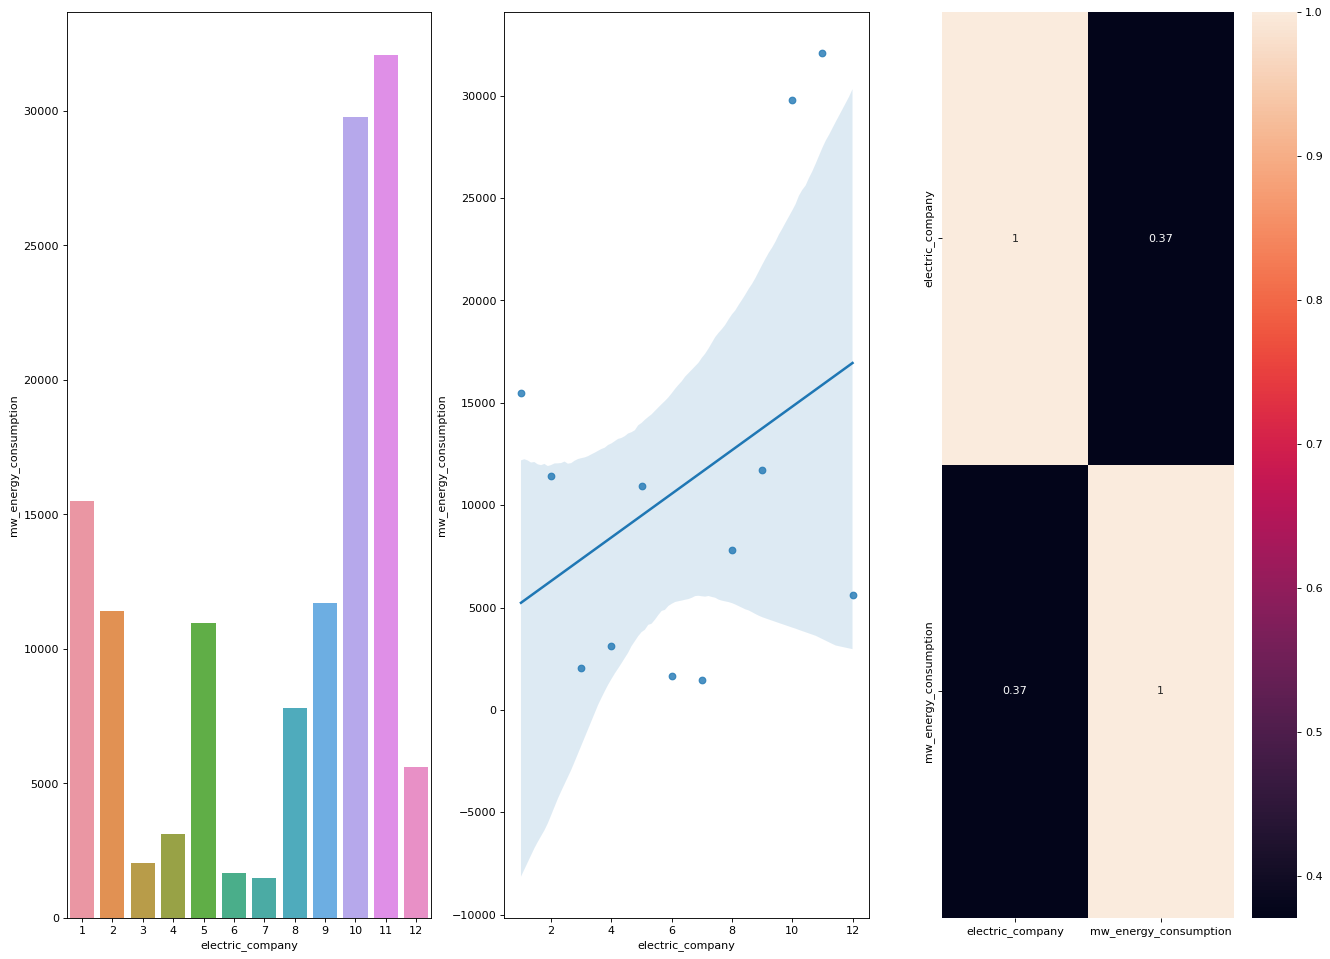

In [27]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,3,1)
aux1 = df4[['electric_company', 'mw_energy_consumption']].groupby( 'electric_company' ).mean().reset_index()

sns.barplot( x='electric_company', y='mw_energy_consumption', data=aux1)

plt.subplot(1,3,2)
aux2 = df4[['electric_company', 'mw_energy_consumption']].groupby( 'electric_company' ).mean().reset_index()
sns.regplot( x='electric_company', y='mw_energy_consumption', data=aux2 )
plt.subplot(1,3,3)
aux3 = df4[['electric_company', 'mw_energy_consumption']].groupby( 'electric_company' ).mean().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True )

### Yearly consume energy
From 1997 to 2018, more electricity was used in the first 4 years, and then gradually decreased

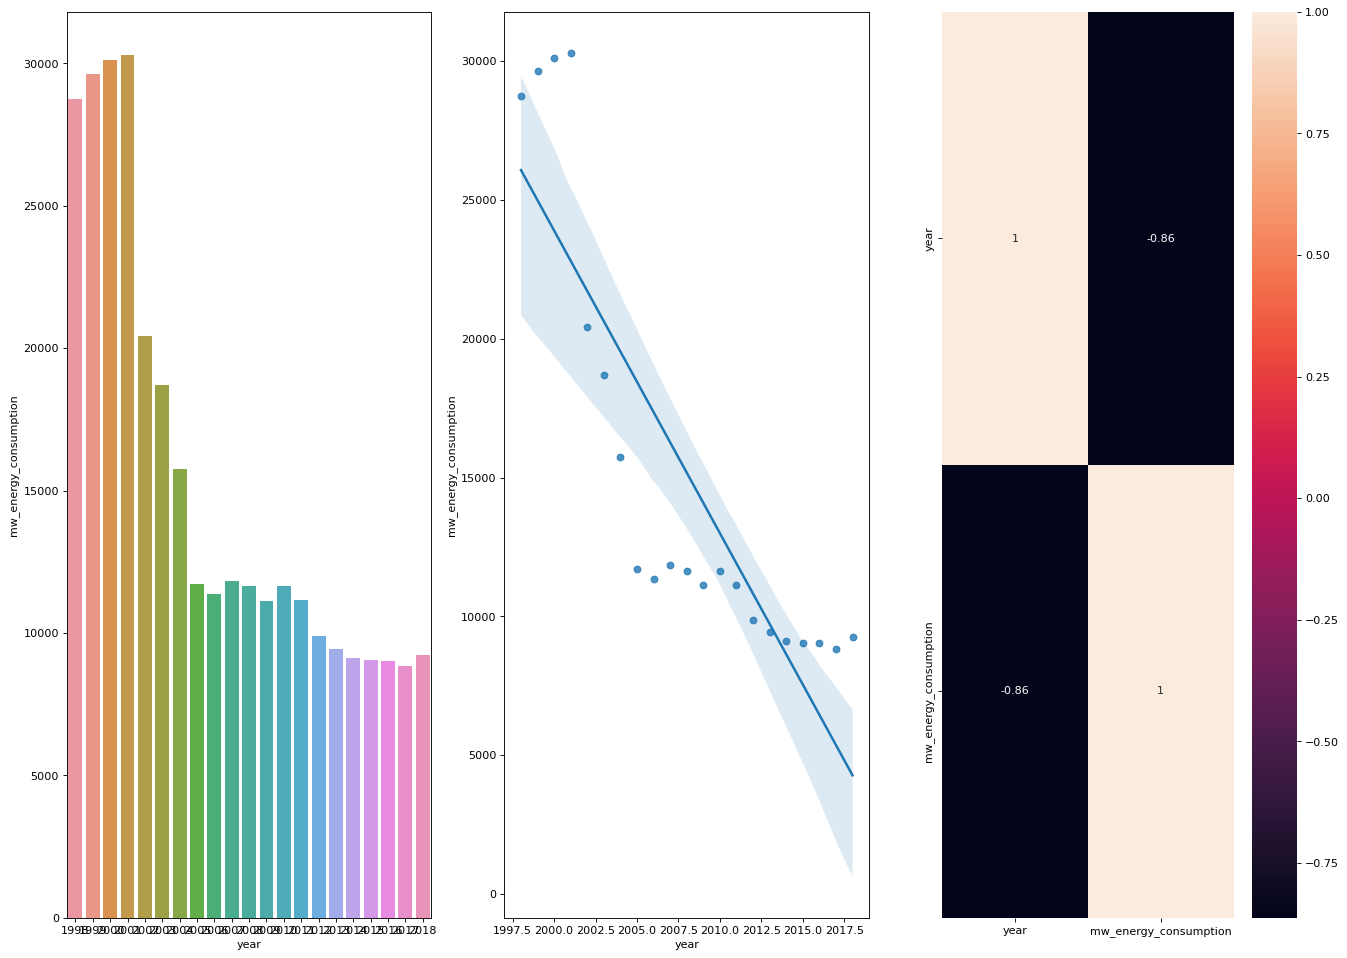

In [28]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,3,1)
aux1 = df4[['year', 'mw_energy_consumption']].groupby( 'year' ).mean().reset_index()

sns.barplot( x='year', y='mw_energy_consumption', data=aux1)
# part of day should be number not str


plt.subplot(1,3,2)
aux2 = df4[['year', 'mw_energy_consumption']].groupby( 'year' ).mean().reset_index()
sns.regplot( x='year', y='mw_energy_consumption', data=aux2 )

plt.subplot(1,3,3)
aux3 = df4[['year', 'mw_energy_consumption']].groupby( 'year' ).mean().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True );

### Higher or lower temperature seasons consume more energy

TRUE When we see the sum of all energy consumption, we see that winter and summer are the most intense seasons, recording the highest energy consumption. At the same time, when we have dispersed over the years, we observe the same behavior, with few exceptions.

<AxesSubplot:>

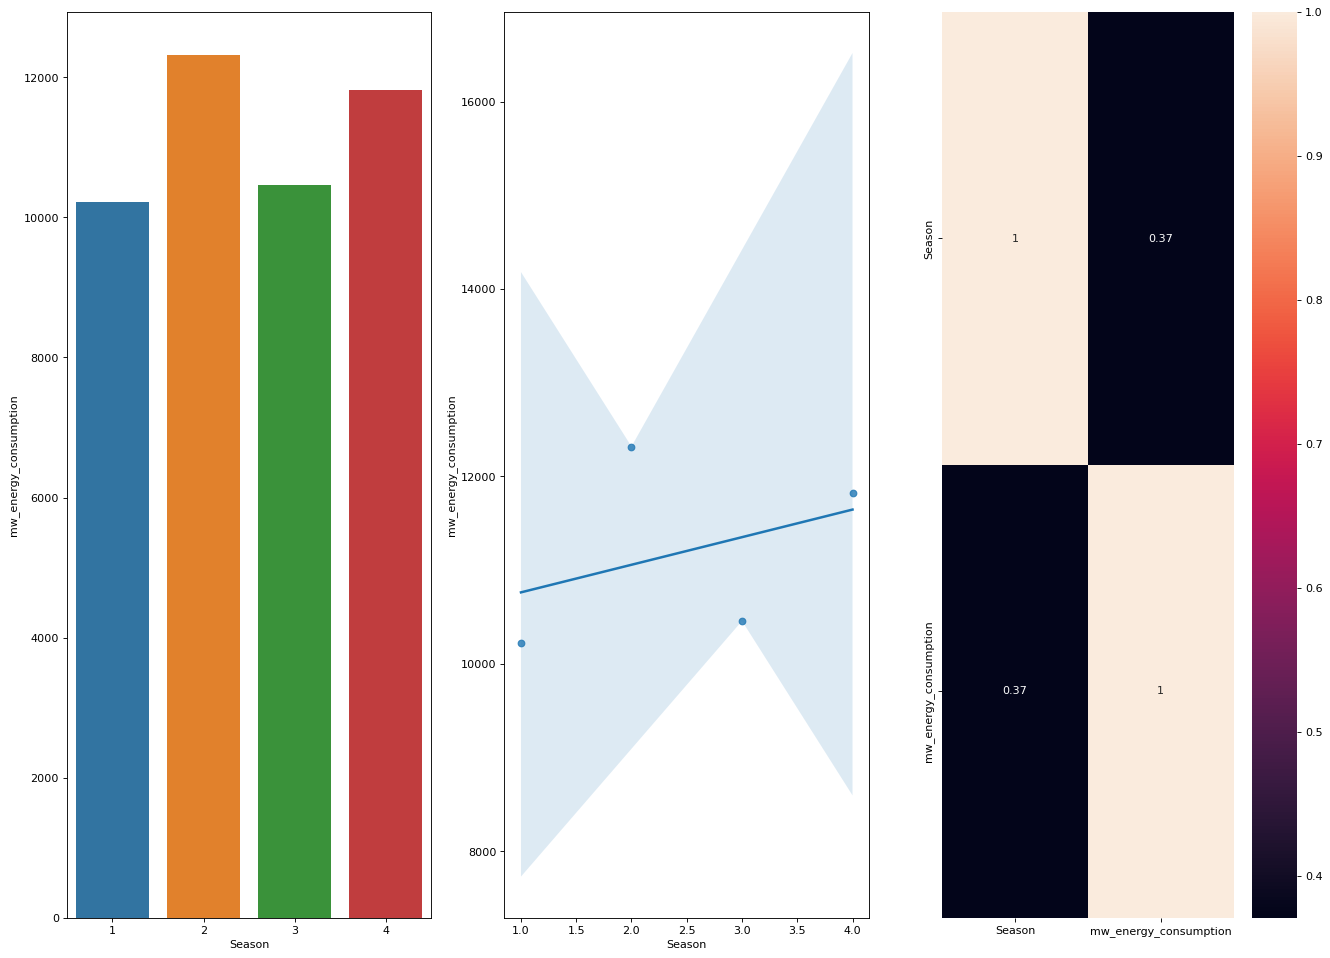

In [29]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,3,1)
aux1 = df4[['Season', 'mw_energy_consumption']].groupby( 'Season' ).mean().reset_index()
sns.barplot( x='Season', y='mw_energy_consumption', data=aux1)
# part of day should be number not str

plt.subplot(1,3,2)
aux2 = df4[['Season', 'mw_energy_consumption']].groupby( 'Season' ).mean().reset_index()
sns.regplot( x='Season', y='mw_energy_consumption', data=aux2 )

plt.subplot(1,3,3)
aux3 = df4[['Season', 'mw_energy_consumption']].groupby( 'Season' ).mean().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True )



### Consume more energy during weekends

FALSE Less energy is consumed during the weekend.

<AxesSubplot:>

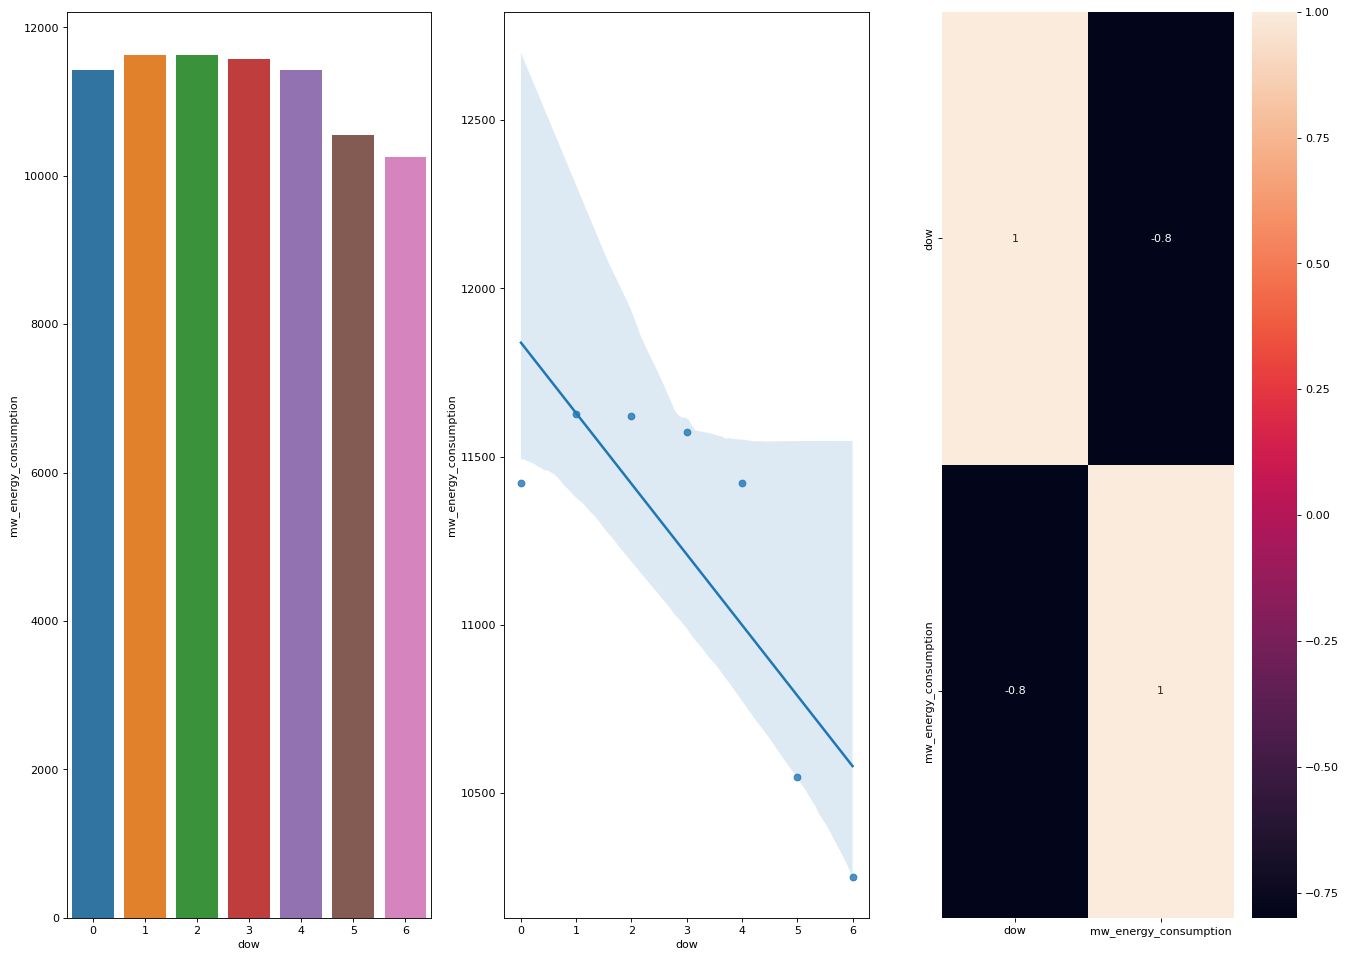

In [30]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,3,1)
aux1 = df4[['dow', 'mw_energy_consumption']].groupby( 'dow' ).mean().reset_index()

sns.barplot( x='dow', y='mw_energy_consumption', data=aux1)
# part of day should be number not str


plt.subplot(1,3,2)
aux2 = df4[['dow', 'mw_energy_consumption']].groupby( 'dow' ).mean().reset_index()
sns.regplot( x='dow', y='mw_energy_consumption', data=aux2 )

plt.subplot(1,3,3)
aux3 = df4[['dow', 'mw_energy_consumption']].groupby( 'dow' ).mean().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True )

### Workday consume more energy

TRUE workdays consume more energy than weekends

<AxesSubplot:>

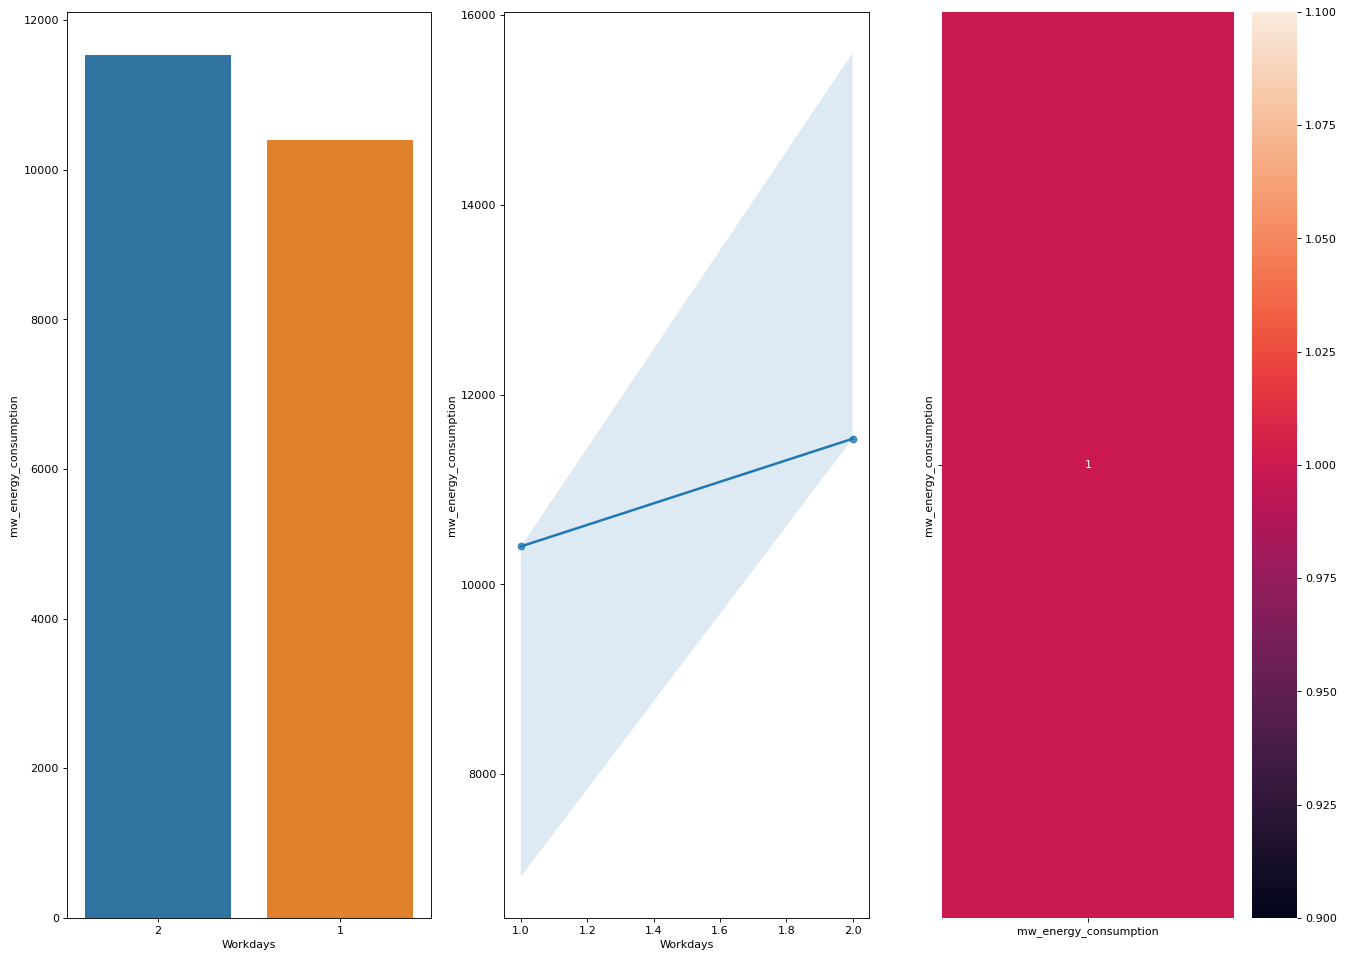

In [31]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,3,1)
aux1 = df4[['Workdays', 'mw_energy_consumption']].groupby( 'Workdays' ).mean().reset_index()

sns.barplot( x='Workdays', y='mw_energy_consumption', data=aux1)
# part of day should be number not str


plt.subplot(1,3,2)
aux2 = df4[['Workdays', 'mw_energy_consumption']].groupby( 'Workdays' ).mean().reset_index()
sns.regplot( x='Workdays', y='mw_energy_consumption', data=aux2 )

plt.subplot(1,3,3)
aux3 = df4[['Workdays', 'mw_energy_consumption']].groupby( 'Workdays' ).mean().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True )

<AxesSubplot:xlabel='year', ylabel='mw_energy_consumption'>

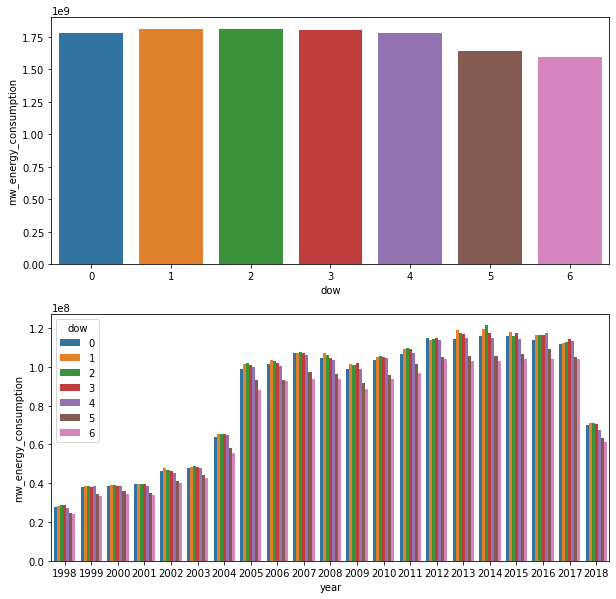

In [32]:
plt.figure(figsize=(10,10))
aux1 = df4[['dow', 'mw_energy_consumption']].groupby( 'dow' ).sum().reset_index()
plt.subplot( 2, 1, 1 )
sns.barplot( x='dow', y='mw_energy_consumption', data=aux1 )

aux2 = df4[['year', 'dow', 'mw_energy_consumption']].groupby( ['year', 'dow'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='year', y='mw_energy_consumption', hue='dow', data=aux2 )

<AxesSubplot:>

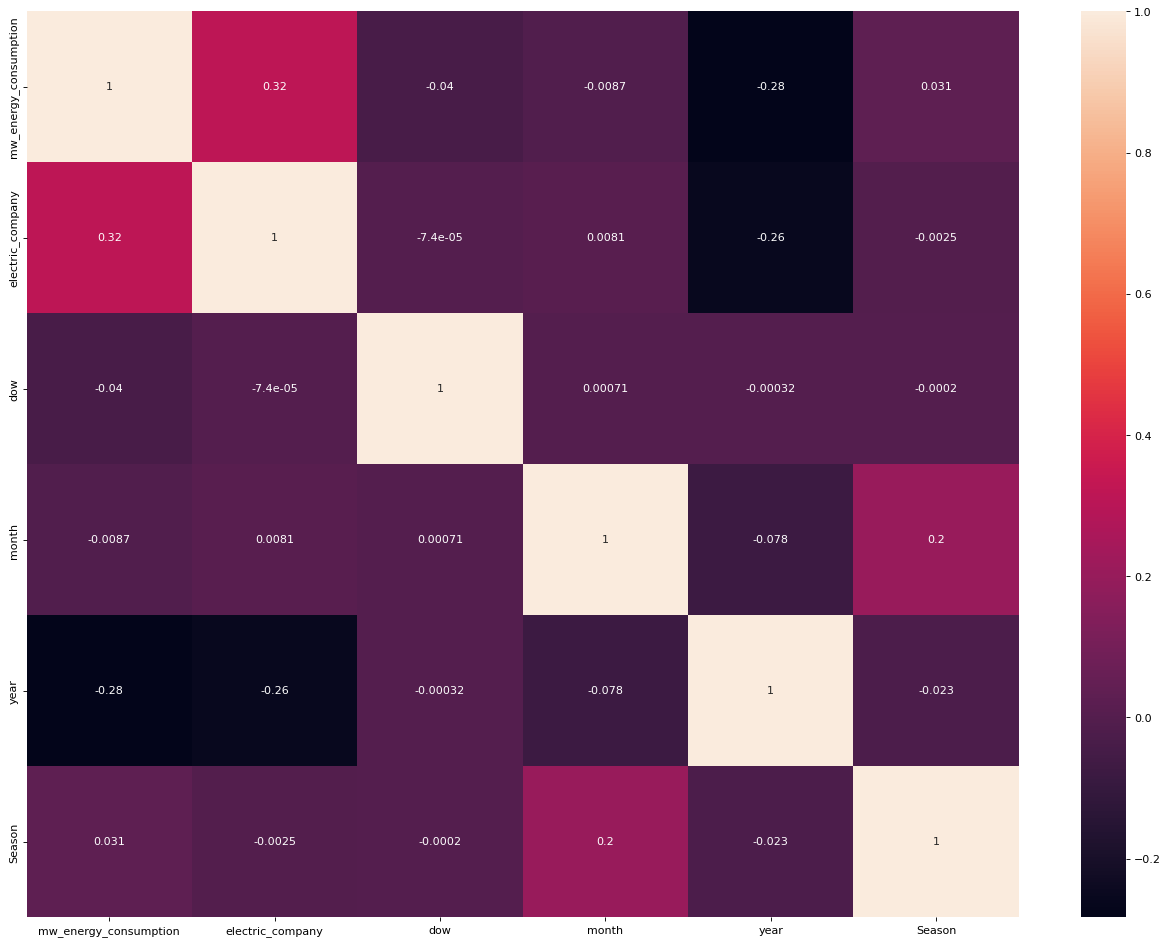

In [33]:
correlation = df4.corr( method='pearson' )
plt.figure(figsize=(20, 15), dpi=80)
sns.heatmap( correlation, annot=True )

In [34]:
df6=df2_1.copy()
df5=df2_1.copy()
df7 = df2_1.copy()


In [35]:
df6

Datetime  mw_energy_consumption electric_company  dow  \
0       1998-04-01 01:00:00                22259.0              PJM    2   
1       1998-04-01 02:00:00                21244.0              PJM    2   
2       1998-04-01 03:00:00                20651.0              PJM    2   
3       1998-04-01 04:00:00                20421.0              PJM    2   
4       1998-04-01 05:00:00                20713.0              PJM    2   
...                     ...                    ...              ...  ...   
1090119 2018-08-03 00:00:00                 3281.0             DEOK    4   
1090120 2018-08-03 00:00:00                 1448.0             EKPC    4   
1090121 2018-08-03 00:00:00                14809.0              AEP    4   
1090122 2018-08-03 00:00:00                35486.0             PJME    4   
1090123 2018-08-03 00:00:00                 5489.0             PJMW    4   

         month  year Day_session Workdays  Season  
0            4  1998       Night  workday  Spring  
1            4  1998       Night  workday  Spring  
2            4  1998       Night  workday  Spring  
3            4  1998       Night  workday  Spring  
4            4  1998       Night  workday  Spring  
...        ...   ...         ...      ...     ...  
1090119      8  2018       Night  workday  Summer  
1090120      8  2018       Night  workday  Summer  
1090121      8  2018       Night  workday  Summer  
1090122      8  2018       Night  workday  Summer  
1090123      8  2018       Night  workday  Summer  

[1090124 rows x 9 columns]

# DATA PREPARATION & FEATURE SELECTIONs

### Splitting, scaling and encoding the data frame

First we split our data to train and test sets with desired ratio, then sacle numerical values ( eneregy consumtion  & year) for desired region.

In [36]:
# Split dataframe into training and test dataset
def split_and_scaling(df,fraction=0.8):
    X_train, X_test = pd.DataFrame([]), pd.DataFrame([])
    col_to_scaling=['mw_energy_consumption','year']
    mn = df[col_to_scaling].min()
    mx = df[col_to_scaling].max()
    scaler=MinMaxScaler() # converting the value of the range to 0 to 1
    df[col_to_scaling]= scaler.fit_transform(df[col_to_scaling])
    
    for name in df['electric_company'].unique():
        #coo_name=df[df['electric_company'] == name]
        co_name= df.loc[df['electric_company']== name]
        a=int(len(co_name)*fraction)
        train=co_name.iloc[:a]
        test= co_name.iloc[a:]
        
        X_train = X_train.append(train)
        X_test = X_test.append(test)
       
    return X_train,X_test,mn,mx



Following fuction preform encoding on categorical data with **pandas.get_dummies** built-in function and in next step we drop main features.

In [37]:
def dummies_split(df,region_name,fraction=.8):
        X_train,X_test,mn,mx = split_and_scaling(df,fraction)
        X_train1= pd.get_dummies(data=X_train,columns=['Day_session','Season','dow','Workdays','month']).loc[X_train['electric_company']==region_name]

        X_train1=X_train1.drop(['Datetime','mw_energy_consumption'],axis='columns')
        X_train2=X_train1
        y_train1=X_train['mw_energy_consumption'].loc[X_train['electric_company']==region_name]
        y_train2=pd.DataFrame(y_train1)


        X_test1= pd.get_dummies(data=X_test,columns=['Day_session','Season','dow','Workdays','month']).loc[X_test['electric_company']==region_name]

        X_test1=X_test1.drop(['Datetime','mw_energy_consumption'],axis='columns')
        X_test2=X_test1
        y_test1=X_test['mw_energy_consumption'].loc[X_test['electric_company']==region_name]
        y_test2=pd.DataFrame(y_test1)


        return X_train2,X_test2,y_train2,y_test2,mn,mx

This fucntion will does invers scaling on predicted data after ML model.


In [38]:
def inver_sc(df,y):
    mnn = df['mw_energy_consumption'].min()
    mxx = df['mw_energy_consumption'].max()
    y = np.asarray(y)
    inv_y = y *(mxx-mnn)+ mnn
    return inv_y

# MACHINE LEARNING MODELLING --- ANN ML

In [39]:
def ml_model(region_name,fraction = 0.8, h_layer_sizes = (15,15,15),
             act_fun ='tanh',sol_fun = 'adam',A_pa=0.01,Cross_val =0.2,trian_frac=0.8):

    X_train,X_test,y_train,y_test,mn,mx=dummies_split(df6,region_name,fraction=trian_frac)
    X_train=X_train.drop(['electric_company'],axis='columns')
    X_test=X_test.drop(['electric_company'],axis='columns')
    
    regr_model= MLPRegressor(hidden_layer_sizes = h_layer_sizes, random_state = 1234, activation=act_fun,
                 solver=sol_fun,alpha= A_pa,max_iter=100,learning_rate= 'adaptive',
                 verbose = False,tol =1e-6, early_stopping =True,validation_fraction=Cross_val,
                 warm_start = True)
    regr_model.fit(X_train.to_numpy(), y_train.to_numpy())
    print('The score of model for {company} is {score}: '.format(company=region_name,score=regr_model.score(X_train,y_train)))
    print('The score of model for {company} is {score}: '.format(company=region_name,score=regr_model.score(X_test,y_test)))


    
    y_train_predict = regr_model.predict(X_train.to_numpy())
    y_test_predict = regr_model.predict(X_test.to_numpy())

    print('MSE for train data for is:',mean_squared_error(y_train, y_train_predict,squared=False),
        'and  MSE for test data is:',(mean_squared_error(y_test, y_test_predict,squared=False)))
    #print('MAE for train data',mean_absolute_error(aep_y_train, y_train_predict),
        #'MAE for test data',(mean_absolute_error(aep_y_test, y_test_predict)))
    print('MAPE for train data is:',mean_absolute_percentage_error(y_train, y_train_predict),
        'and MAPE for test data is:',(mean_absolute_percentage_error(y_test, y_test_predict)))


    y_test_predict_uns = inver_sc(df7,y_test_predict)
    y_train_predict_uns = inver_sc(df7,y_train_predict)
    y_train_uns = inver_sc(df7,y_train)
    y_test_uns = inver_sc(df7,y_test)
    
    plt.figure(figsize=(10,8))
    plt.title(region_name,fontsize=25)
    plt.plot(regr_model.loss_curve_ )
    plt.xlabel('Max iteration to converge')
    plt.ylabel('Loss')
    plt.grid(1)
    
    
    plt.figure(figsize=(40,15),dpi =180)
    plt.title(region_name,fontsize=25)
    plt.plot(np.asarray(y_train_predict_uns),'r',alpha = 0.4,label= 'Predicted train data')
    plt.plot(y_train_uns,'b',alpha = 0.3, label= 'Real train data')
    plt.legend(fontsize=25)
    plt.show()
    
    plt.figure(figsize=(40,15),dpi =180)
    plt.title(region_name,fontsize=25)
    plt.plot(y_test_predict_uns,'r',alpha = 0.3,label= 'Predicted test data')
    plt.plot(y_test_uns,'b',alpha = 0.3, label= 'Real test data')
    plt.legend(fontsize=25)
    plt.show()

## 1) ML for AEP electric company


The score of model for AEP is 0.646163253260314: 
The score of model for AEP is 0.5201562863843443: 
RMSE for train data for is: 0.025054030397563792 and  RMSE for test data is: 0.027530703147316666
MAPE for train data is: 0.07785444569492048 and MAPE for test data is: 0.09530035145048492


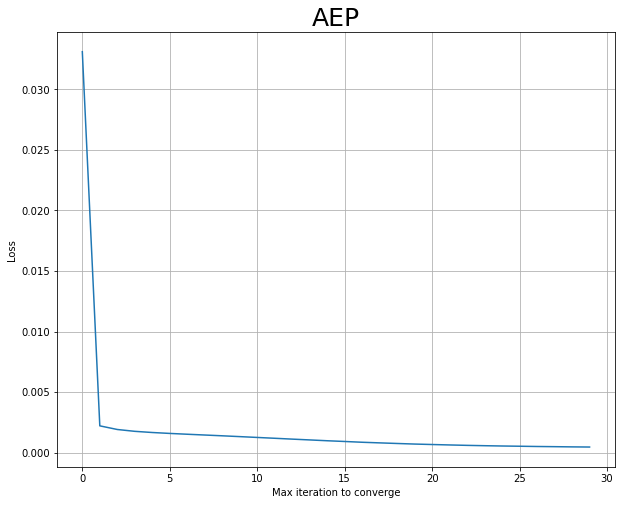

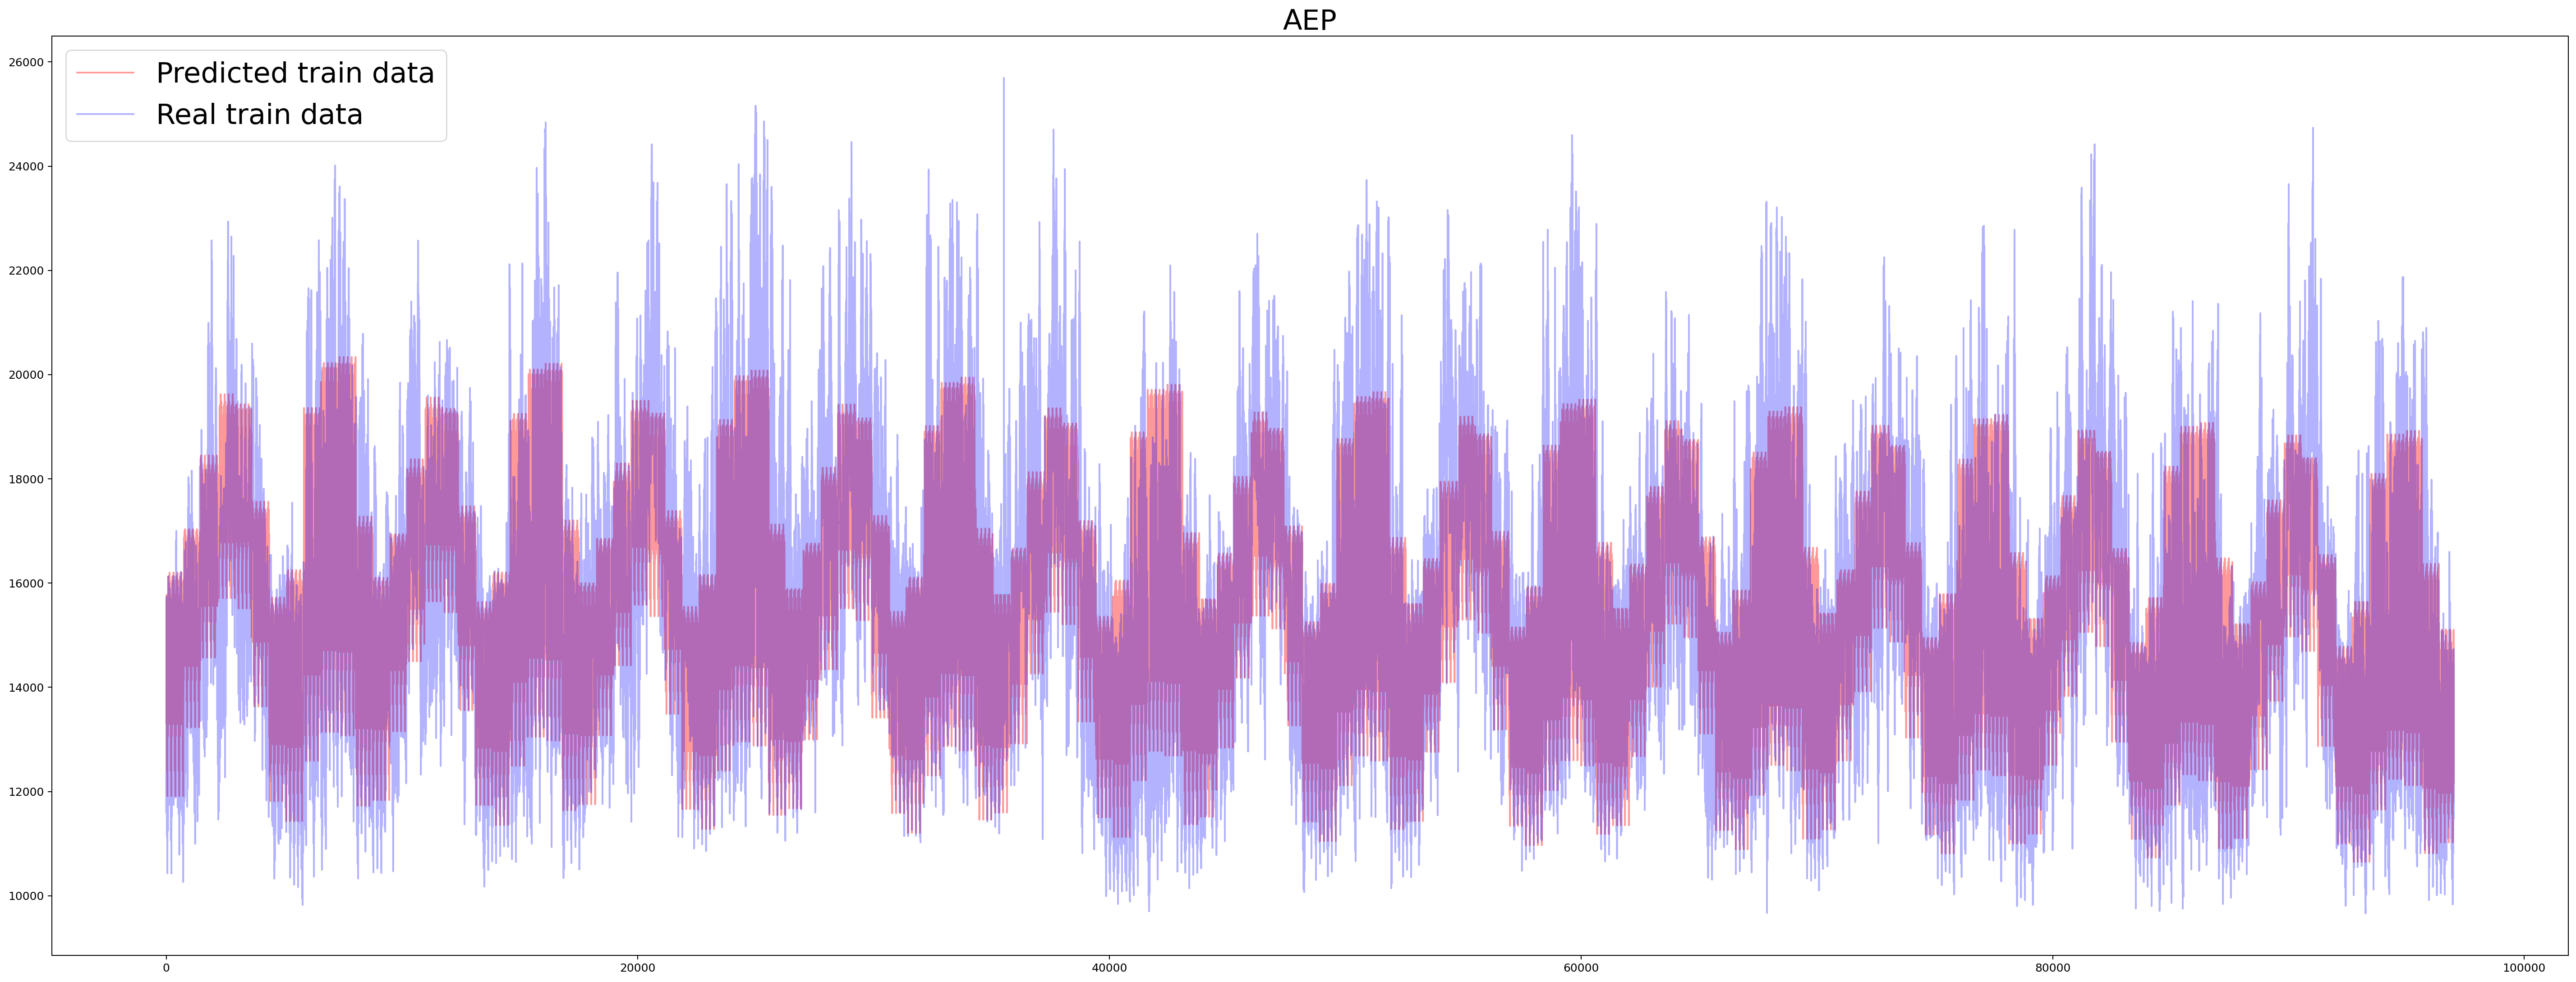

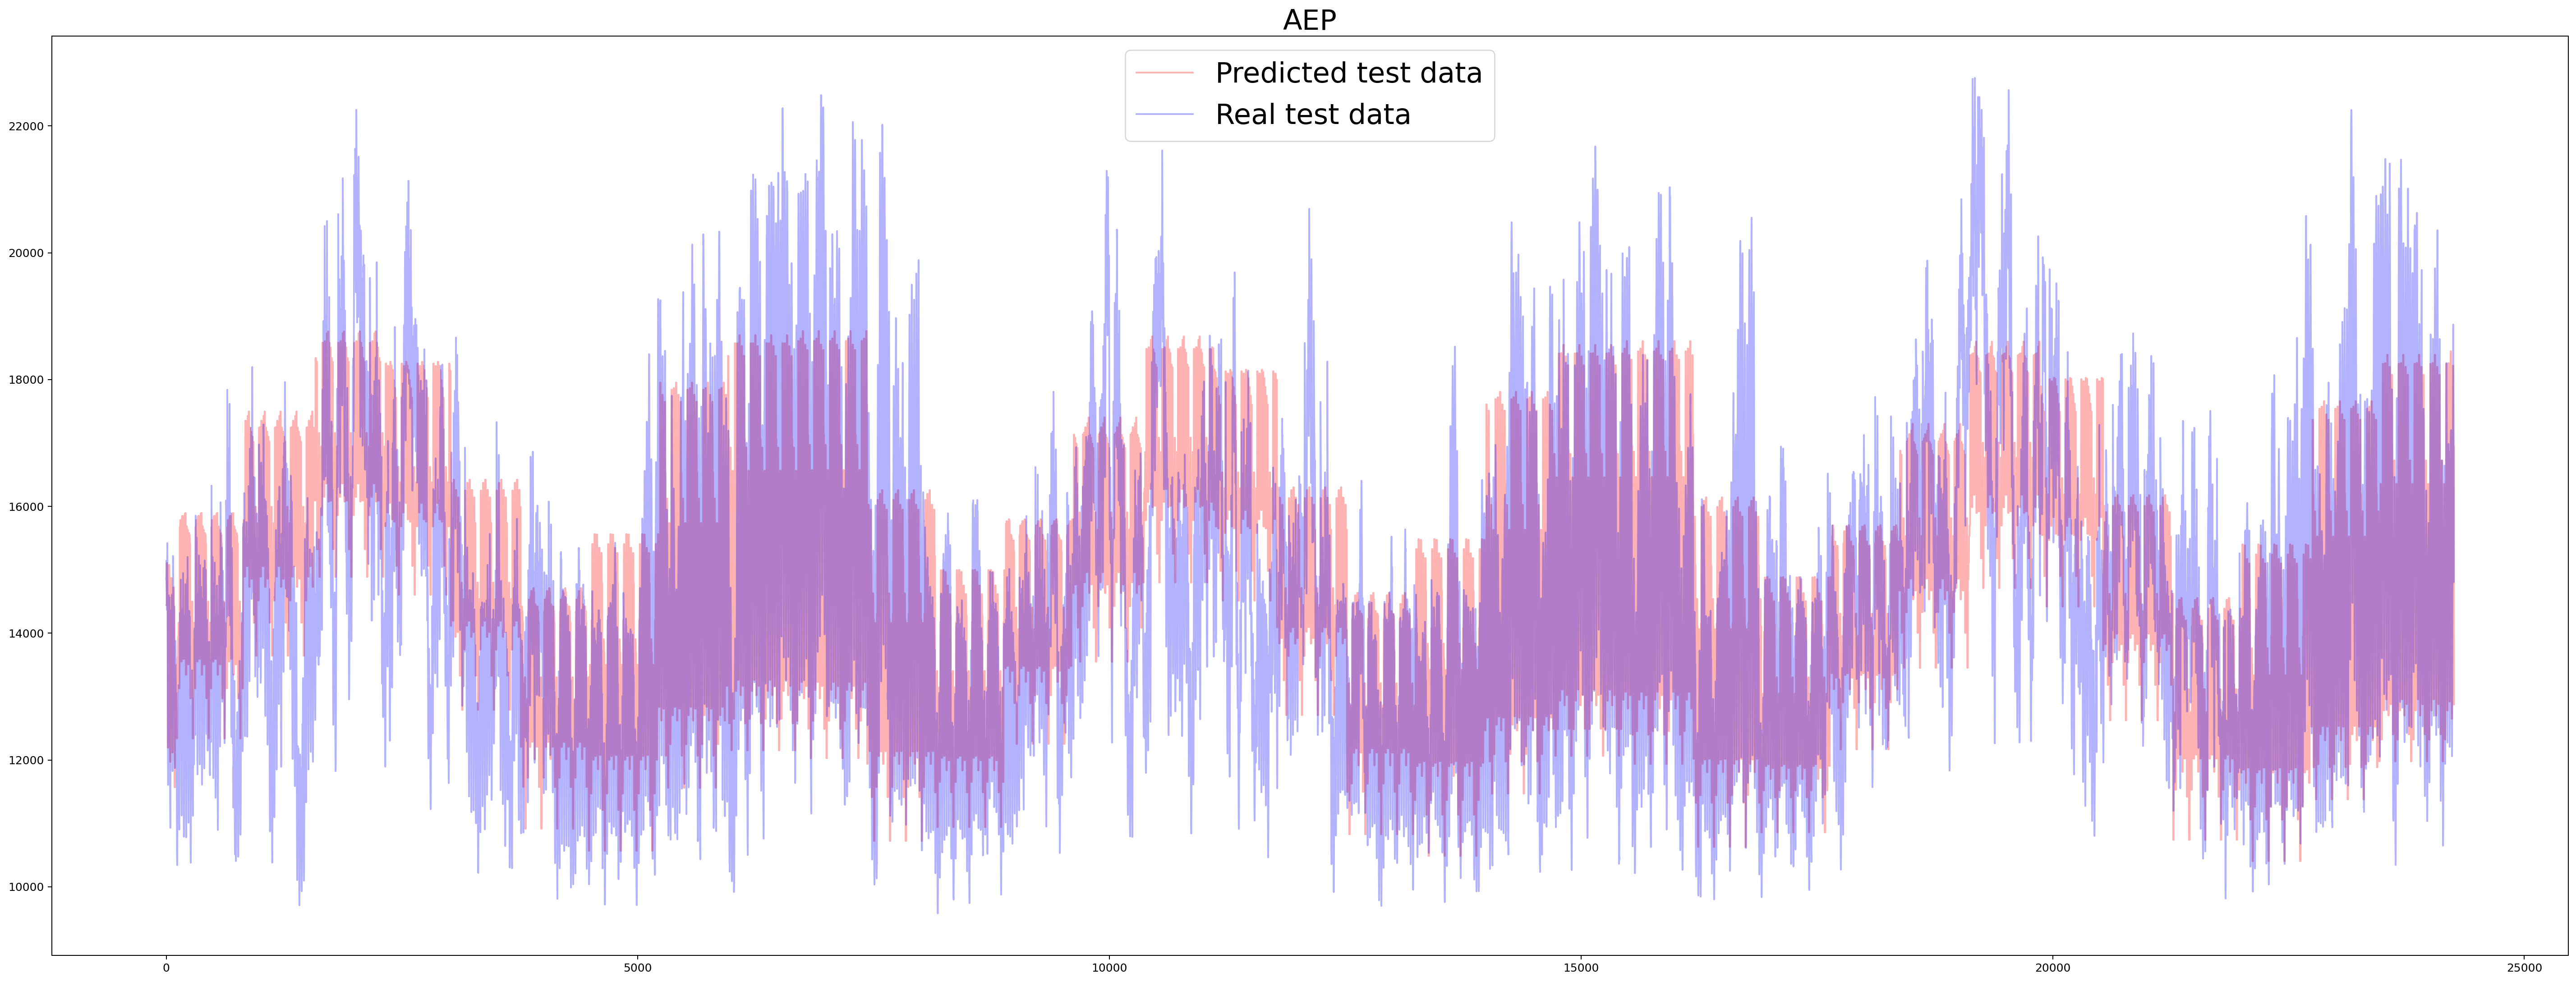

In [40]:
ml_model('AEP',h_layer_sizes = (15,15,15),
         act_fun ='tanh',
         sol_fun = 'adam',
         A_pa=0.01,
         Cross_val =0.2,
         trian_frac=0.8)


## 2) ML model for COMED electric company

In [ ]:
ml_model('COMED',h_layer_sizes = (15,15,15),
         act_fun ='tanh',
         sol_fun = 'adam',
         A_pa=0.01,
         Cross_val =0.2,
         trian_frac=0.8)

## 3) ML model for DAYTON electric company

In [ ]:
ml_model('DAYTON',h_layer_sizes = (15,15,15),
         act_fun ='tanh',
         sol_fun = 'adam',
         A_pa=0.01,
         Cross_val =0.2,
         trian_frac=0.8)

## 4) ML model for DEOK electric company

In [ ]:
ml_model('DEOK',h_layer_sizes = (15,15,15),
         act_fun ='tanh',
         sol_fun = 'adam',
         A_pa=0.01,
         Cross_val =0.2,
         trian_frac=0.8)

## 5) ML model for DOM electric company

In [ ]:
ml_model('DOM',h_layer_sizes = (15,15,15),
         act_fun ='tanh',
         sol_fun = 'adam',
         A_pa=0.01,
         Cross_val =0.2,
         trian_frac=0.8)

## 6) ML model for DUQ electric company

In [ ]:
ml_model('DUQ',h_layer_sizes = (15,15,15),
         act_fun ='tanh',
         sol_fun = 'adam',
         A_pa=0.01,
         Cross_val =0.2,
         trian_frac=0.8)

## 7) ML model for EKPC electric company

In [ ]:
ml_model('EKPC',h_layer_sizes = (15,15,15),
         act_fun ='tanh',
         sol_fun = 'adam',
         A_pa=0.01,
         Cross_val =0.2,
         trian_frac=0.8)

## 8) ML model for FE electric company

In [ ]:
ml_model('FE',h_layer_sizes = (15,15,15),
         act_fun ='tanh',
         sol_fun = 'adam',
         A_pa=0.01,
         Cross_val =0.2,
         trian_frac=0.8)

## 9) ML model for NI electric company

In [ ]:
ml_model('NI',h_layer_sizes = (15,15,15),
         act_fun ='tanh',
         sol_fun = 'adam',
         A_pa=0.01,
         Cross_val =0.2,
         trian_frac=0.8)

## 10) ML model for PJME electric company

In [ ]:
ml_model('PJME',h_layer_sizes = (15,15,15),
         act_fun ='tanh',
         sol_fun = 'adam',
         A_pa=0.01,
         Cross_val =0.2,
         trian_frac=0.8)

## 11) ML model for PJMW electric company

In [ ]:
ml_model('PJMW',h_layer_sizes = (15,15,15),
         act_fun ='tanh',
         sol_fun = 'adam',
         A_pa=0.01,
         Cross_val =0.2,
         trian_frac=0.8)

## 12) ML model for PJM electric company

In [ ]:
ml_model('PJM',h_layer_sizes = (15,15,15),
         act_fun ='tanh',
         sol_fun = 'adam',
         A_pa=0.01,
         Cross_val =0.2,
         trian_frac=0.8)

## In next step we apply same Machine Learning algorithm on whole dataset in one run.
    we prefrom data encoding , scaling and splitting at ones.

In [42]:
col_to_scaling=['mw_energy_consumption','year']
scaler=MinMaxScaler() # converting the value of the range to 0 to 1
df5[col_to_scaling]= scaler.fit_transform(df5[col_to_scaling])


In [43]:
def split_train(df,fraction=0.8):
    X_train, X_test = pd.DataFrame([]), pd.DataFrame()
    for name in df['electric_company'].unique():
        co_name= df.loc[df['electric_company']== name]
        a=int(len(co_name)*fraction)
        train=co_name.iloc[:a]
        test= co_name.iloc[a:]
        X_train = X_train.append(train)
        X_test = X_test.append(test)
    return X_train,X_test


In [44]:
X_train,X_test=split_train(df5,fraction=0.8)


X_train1= pd.get_dummies(data=X_train,columns=['Day_session','Season','dow','electric_company','month'])
X_train1=X_train1.drop(['Datetime','Workdays'],axis='columns')
X_train2=X_train1.drop(['mw_energy_consumption'],axis='columns')
y_train2=X_train1['mw_energy_consumption']



X_test1= pd.get_dummies(data=X_test,columns=['Day_session','Season','dow','electric_company','month'])
X_test1=X_test1.drop(['Datetime','Workdays'],axis='columns')
X_test2=X_test1.drop(['mw_energy_consumption'],axis='columns')
y_test2 = X_test1['mw_energy_consumption']



In [45]:
y_train2

0         0.353606
1         0.337101
2         0.327458
3         0.323717
4         0.328466
            ...   
999419    0.017774
999428    0.015660
999438    0.014375
999447    0.013172
999461    0.012749
Name: mw_energy_consumption, Length: 872095, dtype: float64

In [46]:
regr_model = MLPRegressor(hidden_layer_sizes = (15,100,100,15),random_state = 1234, activation='relu',solver='adam',alpha= 0.01,
                        max_iter=100,learning_rate= 'adaptive',verbose = True,
                          tol =1e-6,early_stopping =True,validation_fraction=0.2, warm_start = True) 

regr_model.fit(X_train2.to_numpy(), y_train2.to_numpy())
y_train_predict = regr_model.predict(X_train2)
y_test_predict = regr_model.predict(X_test2)

print('The score of model all regions is {score}: '.format(score=regr_model.score(X_train2,y_train2)))
print('The score of model all regions is {score}: '.format(score=regr_model.score(X_test2,y_test2)))

y_train_predict = regr_model.predict(X_train2.to_numpy())
y_test_predict = regr_model.predict(X_test2.to_numpy())

print('MSE for train data for is:',mean_squared_error(y_train2, y_train_predict,squared=False),
        'and  RMSE for test data is:',(mean_squared_error(y_test2, y_test_predict,squared=False)))
#print('MAE for train data',mean_absolute_error(aep_y_train, y_train_predict),
        #'MAE for test data',(mean_absolute_error(aep_y_test, y_test_predict)))
print('MAPE for train data is:',mean_absolute_percentage_error(y_train2, y_train_predict),
        'and MAPE for test data is:',(mean_absolute_percentage_error(y_test2, y_test_predict)))

Iteration 1, loss = 0.00221280
Validation score: 0.972131
Iteration 2, loss = 0.00067189
Validation score: 0.972228
Iteration 3, loss = 0.00057227
Validation score: 0.972282
Iteration 4, loss = 0.00055667
Validation score: 0.972791
Iteration 5, loss = 0.00054969
Validation score: 0.972934
The score of model all regions is 0.9729553591238509: 
The score of model all regions is 0.9650687570346964: 
RMSE for train data for is: 0.028340899817181794 and  RMSE for test data is: 0.031226688222674874
MAPE for train data is: 50227405.874242045 and MAPE for test data is: 0.12434469762614137


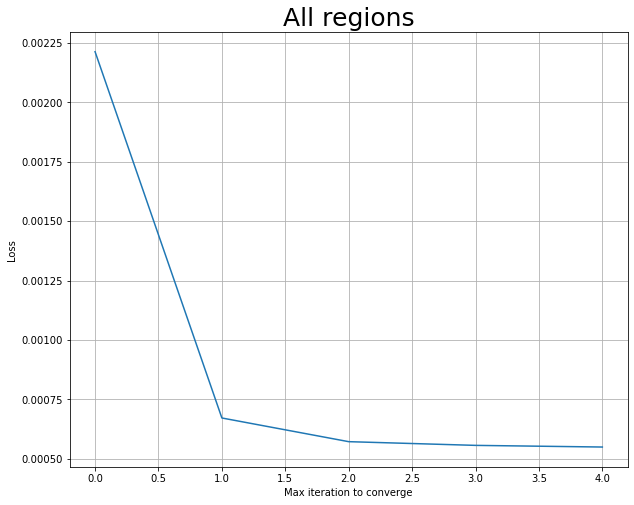

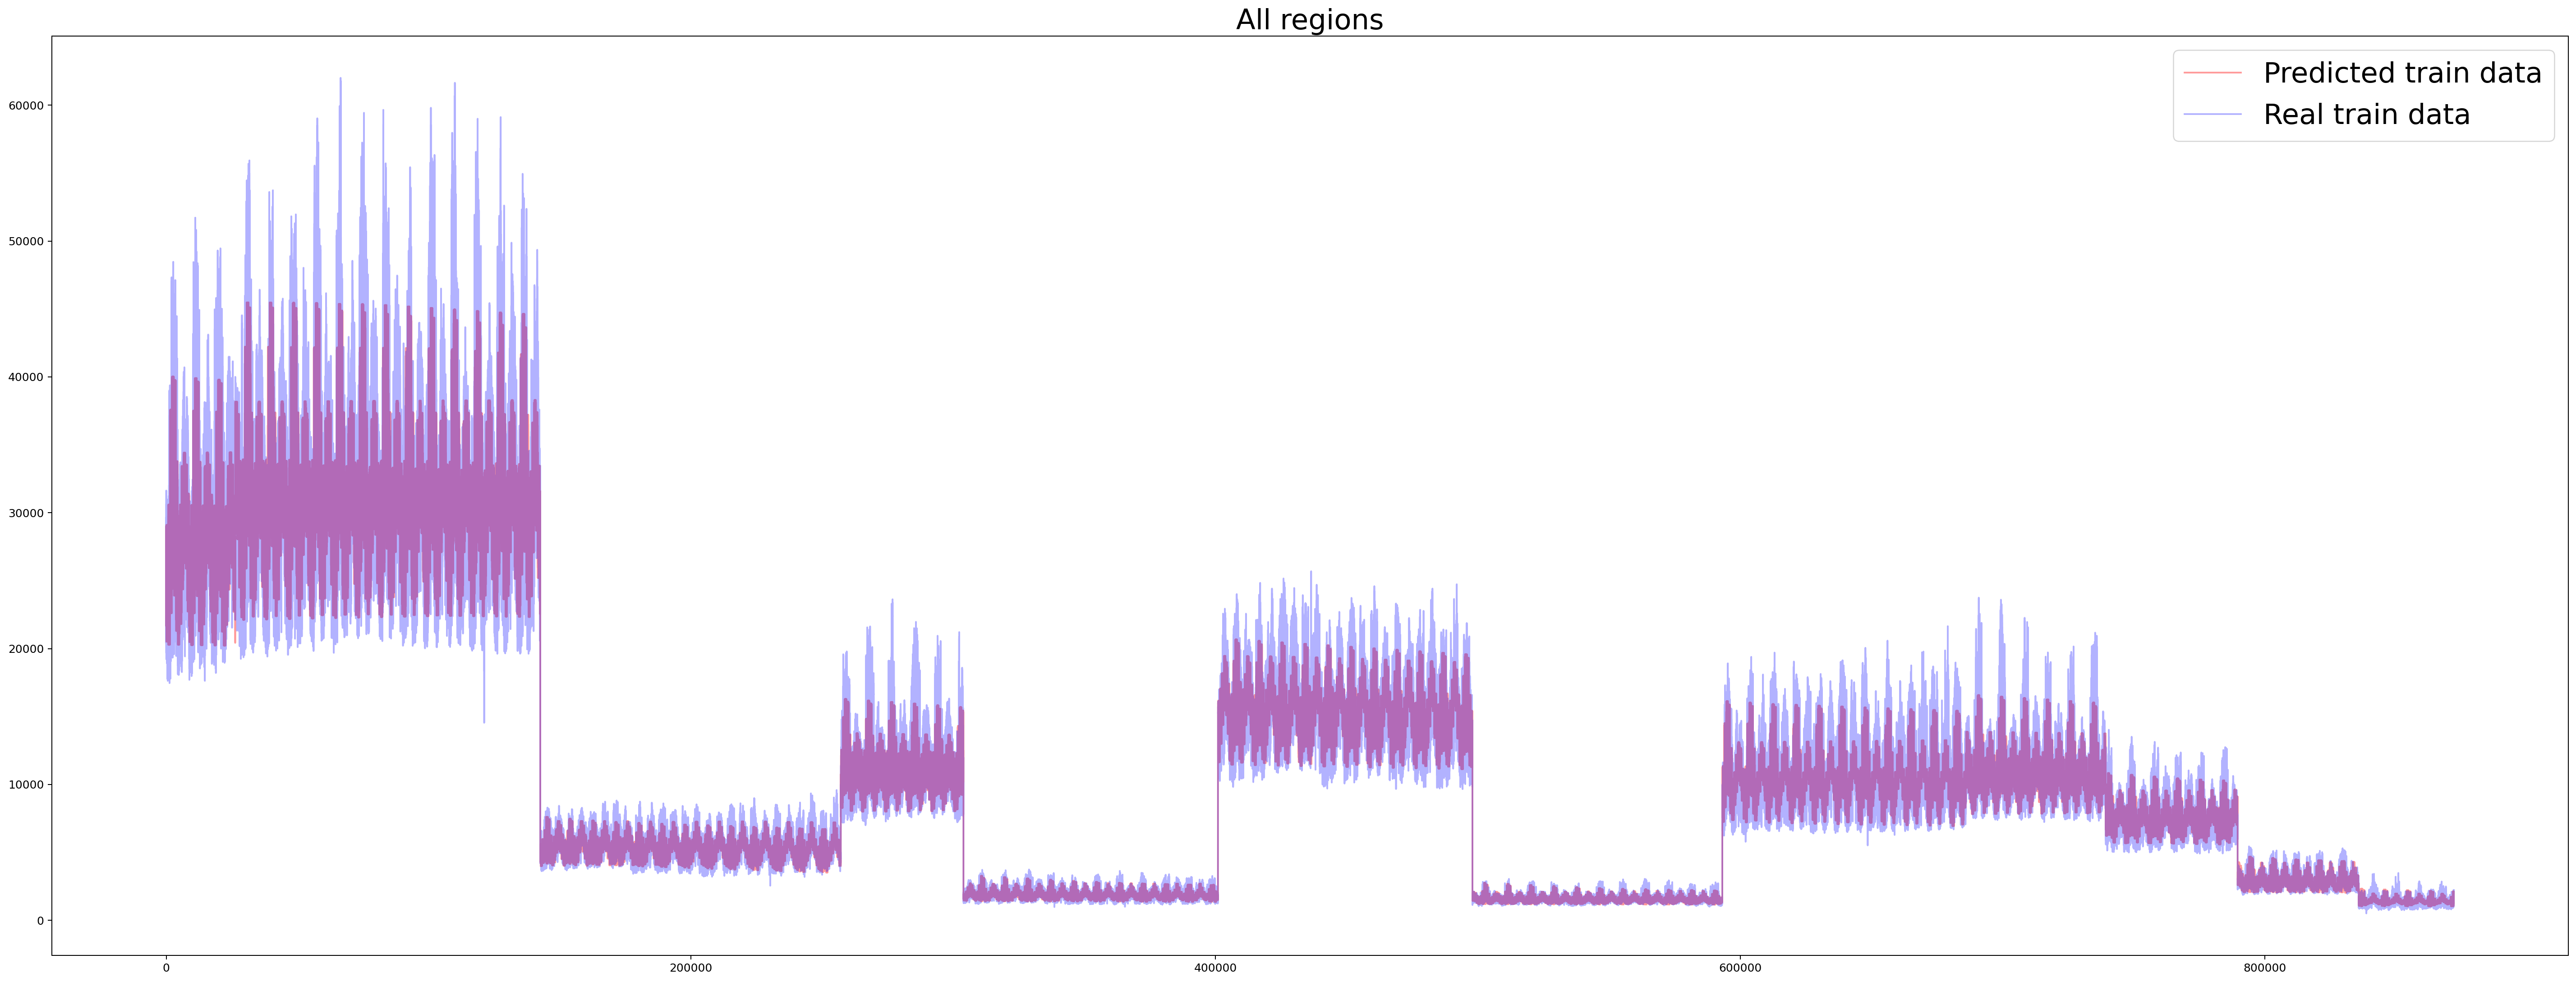

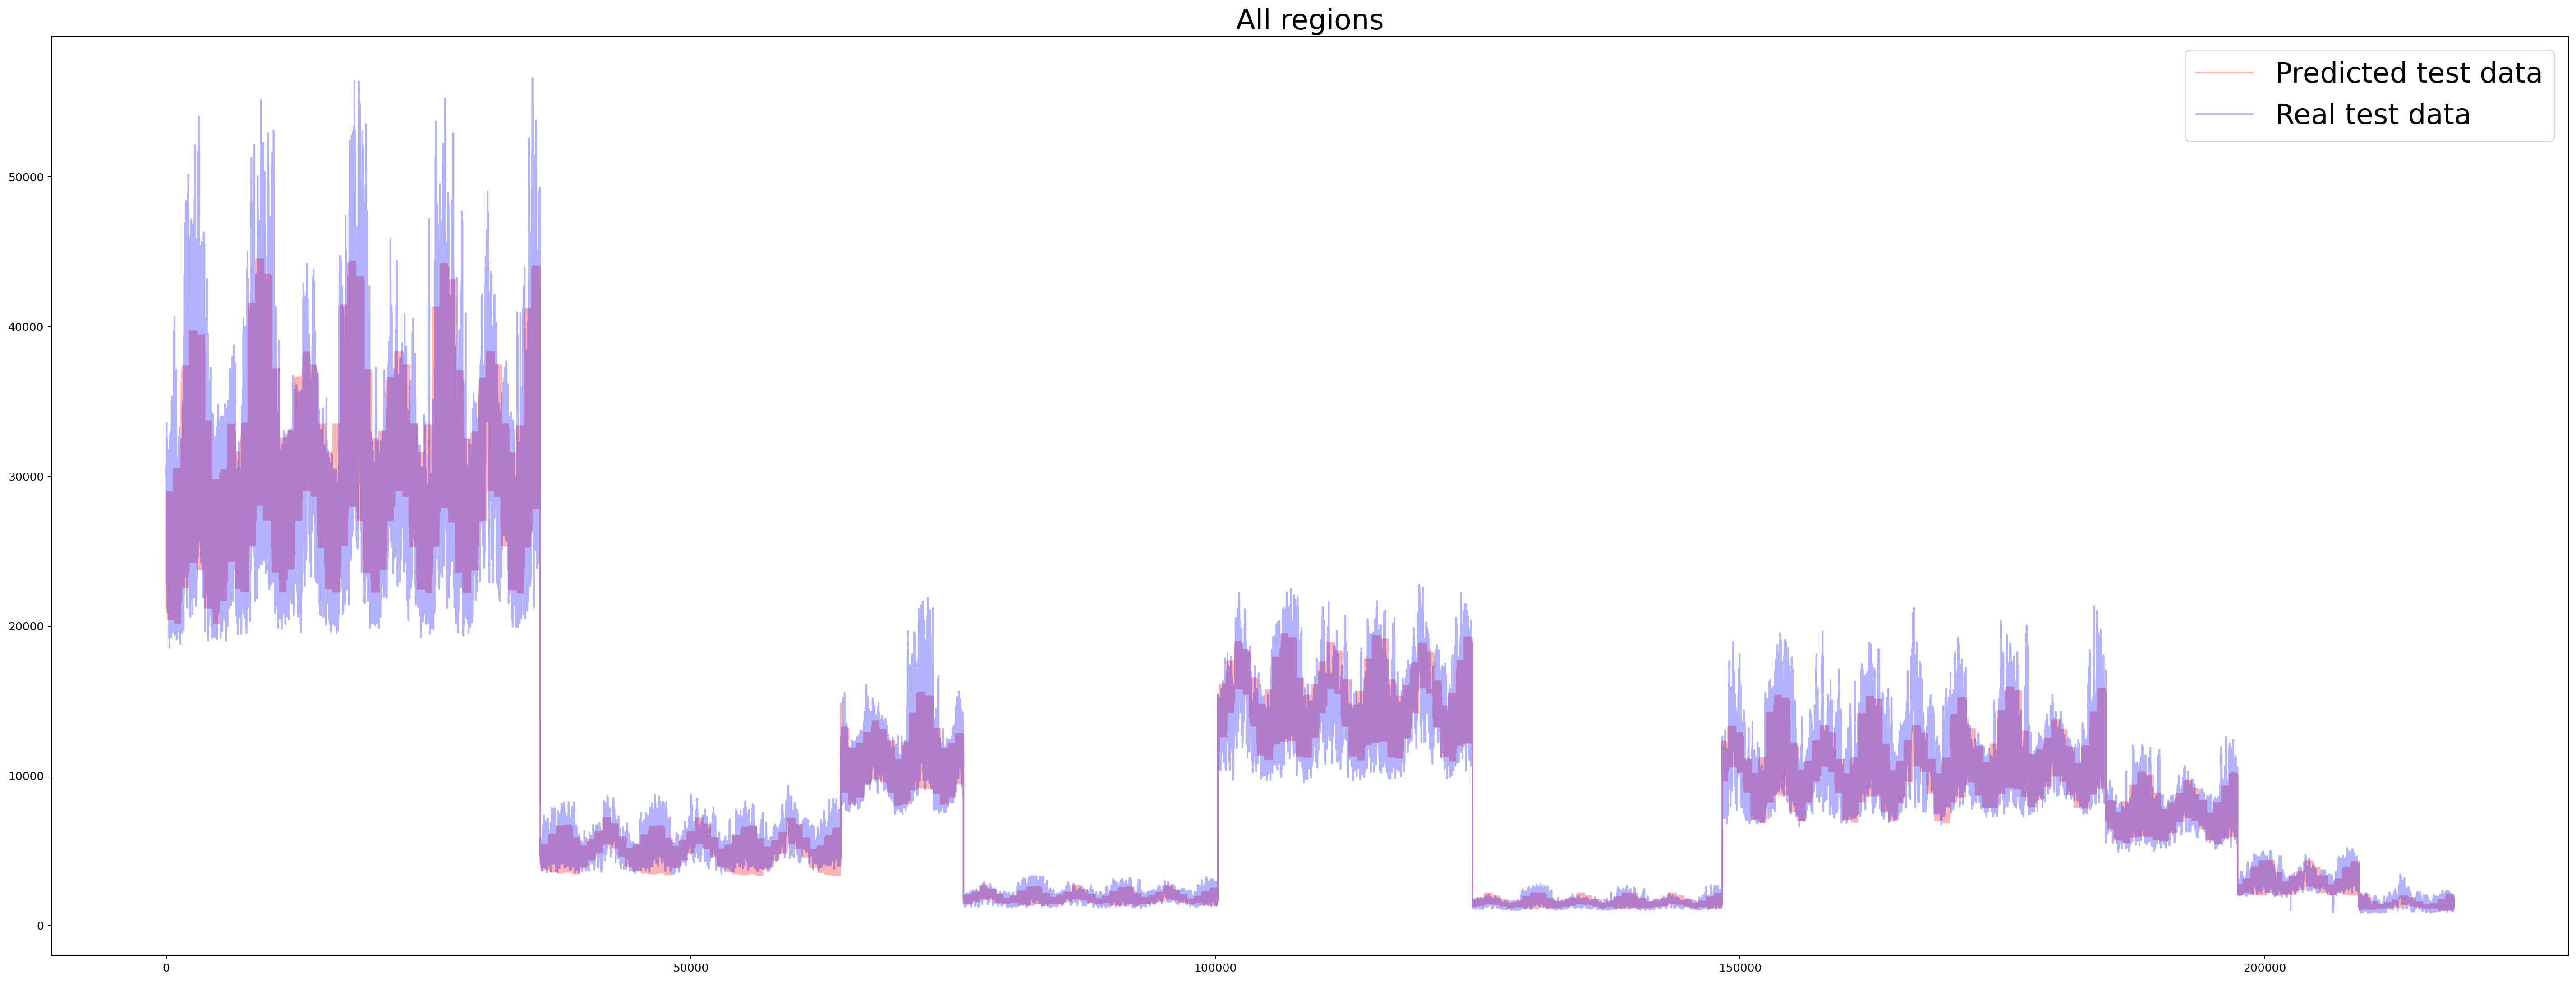

In [47]:

y_test_predict_uns = inver_sc(df7,y_test_predict)
y_train_predict_uns = inver_sc(df7,y_train_predict)
y_train_uns = inver_sc(df7,y_train2)
y_test_uns = inver_sc(df7,y_test2)
    
plt.figure(figsize=(10,8))
plt.title("All regions",fontsize=25)
plt.plot(regr_model.loss_curve_ )
plt.xlabel('Max iteration to converge')
plt.ylabel('Loss')
plt.grid(1)
    
    
plt.figure(figsize=(40,15),dpi =180)
plt.title("All regions",fontsize=25)
plt.plot(np.asarray(y_train_predict_uns),'r',alpha = 0.4,label= 'Predicted train data')
plt.plot(y_train_uns,'b',alpha = 0.3, label= 'Real train data')
plt.legend(fontsize=25)
plt.show()
    
plt.figure(figsize=(40,15),dpi =180)
plt.title("All regions",fontsize=25)
plt.plot(y_test_predict_uns,'r',alpha = 0.3,label= 'Predicted test data')
plt.plot(y_test_uns,'b',alpha = 0.3, label= 'Real test data')
plt.legend(fontsize=25)
plt.show()

In [ ]:
stop